In [2]:
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

Plot successfully saved to /Users/neginmanshour/Desktop/PpEv/Figures/Main/Fig_5a.png


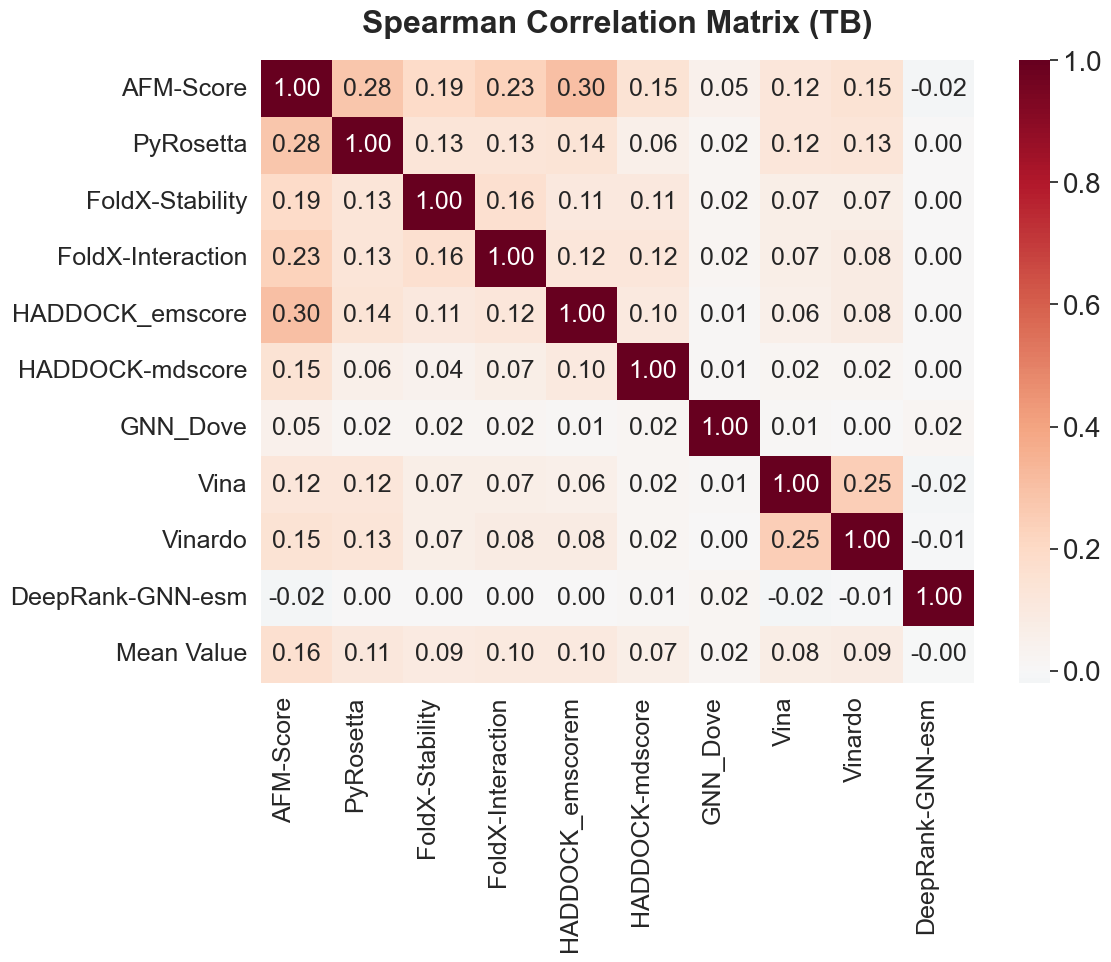

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the new correlation matrix data for template-based models
data = {
    "AFM-Score": [1, 0.28, 0.19, 0.23, 0.3, 0.15, 0.05, 0.12, 0.15, -0.02],
    "PyRosetta": [0.28, 1, 0.13, 0.13, 0.14, 0.06, 0.02, 0.12, 0.13, 0.00],
    "FoldX-Stability": [0.19, 0.13, 1, 0.16, 0.11, 0.04, 0.02, 0.07, 0.07, 0.00],
    "FoldX-Interaction": [0.23, 0.13, 0.16, 1, 0.12, 0.07, 0.02, 0.07, 0.08, 0.00],
    "HADDOCK_emscorem": [0.3, 0.14, 0.11, 0.12, 1, 0.1, 0.01, 0.06, 0.08, 0.00],
    "HADDOCK-mdscore": [0.15, 0.06, 0.11, 0.12, 0.1, 1, 0.02, 0.02, 0.02, 0.01],
    "GNN_Dove": [0.05, 0.02, 0.02, 0.02, 0.01, 0.01, 1, 0.01, 0.00, 0.02],
    "Vina": [0.12, 0.12, 0.07, 0.07, 0.06, 0.02, 0.01, 1, 0.25, -0.02],
    "Vinardo": [0.15, 0.13, 0.07, 0.08, 0.08, 0.02, 0.00, 0.25, 1, -0.01],
    "DeepRank-GNN-esm": [-0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.02, -0.02, -0.01, 1]
}

# Convert the data to a DataFrame
correlation_matrix = pd.DataFrame(data, index=["AFM-Score", "PyRosetta", "FoldX-Stability", "FoldX-Interaction", "HADDOCK_emscore", "HADDOCK-mdscore", "GNN_Dove", "Vina", "Vinardo", "DeepRank-GNN-esm"])

# Calculate the average excluding the diagonal values (1's)
average_values = []
for column in correlation_matrix:
    col_values = correlation_matrix[column].tolist()
    avg = np.mean([val for val in col_values if val != 1])
    average_values.append(avg)

# Add a new row for the averages
correlation_matrix.loc['Mean Value'] = average_values

# Create a heatmap
plt.figure(figsize=(12, 10), facecolor='white')  # Set facecolor to white for the figure
sns.set(font_scale=1.6)  # Adjust font scale for clearer annotations

heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0, annot_kws={"size": 18})  # Decrease the font size for annotations
heatmap.set_title('Spearman Correlation Matrix (TB)', fontsize=23, fontweight='bold', pad=20)

# Set the background color of the heatmap to white
heatmap.set_facecolor('white')

# Modify color bar font size
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20)  # Set font size here

# Improve layout
plt.xticks(rotation=90, ha='right', fontsize=18)  # Rotate x labels for better readability
plt.yticks(rotation=0, fontsize=18)  # Ensure y labels are horizontal for clarity
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap

# Define save path
save_path = f"{config['Main_Figures_directory']}/Fig_5a.png"

# Check if directory exists and save the plot
if os.path.exists(os.path.dirname(save_path)):
    if os.access(os.path.dirname(save_path), os.W_OK):
        plt.savefig(save_path, dpi=1000, facecolor='white', bbox_inches='tight')  # Save the figure with 800 dpi for high-quality output and white background
        print(f"Plot successfully saved to {save_path}")
    else:
        print("Error: No write permission to the directory.")
else:
    print("Error: Directory does not exist.")

# Display the plot
plt.show()



Plot successfully saved to /Users/neginmanshour/Desktop/PpEv/Figures/Main/Fig_5b.png


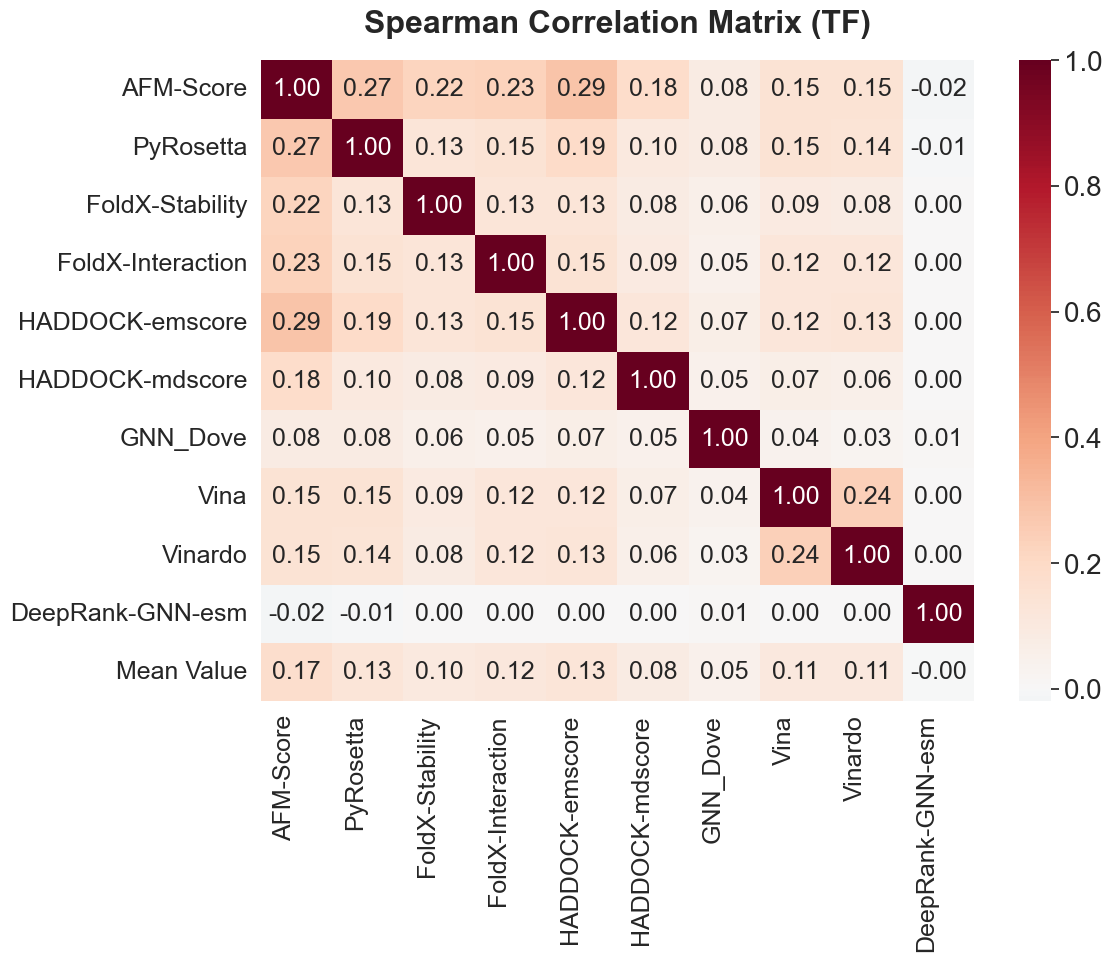

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the new correlation matrix data
data = {
    "AFM-Score": [1, 0.27, 0.22, 0.23, 0.29, 0.18, 0.08, 0.15, 0.15, -0.02],
    "PyRosetta": [0.27, 1, 0.13, 0.15, 0.19, 0.1, 0.08, 0.15, 0.14, -0.01],
    "FoldX-Stability": [0.22, 0.13, 1, 0.13, 0.13, 0.08, 0.06, 0.09, 0.08, 0.00],
    "FoldX-Interaction": [0.23, 0.15, 0.13, 1, 0.15, 0.09, 0.05, 0.12, 0.12, 0.00],
    "HADDOCK-emscore": [0.29, 0.19, 0.13, 0.15, 1, 0.12, 0.07, 0.12, 0.13, 0.00],
    "HADDOCK-mdscore": [0.18, 0.1, 0.08, 0.09, 0.12, 1, 0.05, 0.07, 0.06, 0.00],
    "GNN_Dove": [0.08, 0.08, 0.06, 0.05, 0.07, 0.05, 1, 0.04, 0.03, 0.01],
    "Vina": [0.15, 0.15, 0.09, 0.12, 0.12, 0.07, 0.04, 1, 0.24, 0.00],
    "Vinardo": [0.15, 0.14, 0.08, 0.12, 0.13, 0.06, 0.03, 0.24, 1, 0.00],
    "DeepRank-GNN-esm": [-0.02, -0.01, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.00, 1]
}

# Convert the data to a DataFrame
correlation_matrix = pd.DataFrame(data, index=[
    "AFM-Score", "PyRosetta", "FoldX-Stability", "FoldX-Interaction", "HADDOCK-emscore",
    "HADDOCK-mdscore", "GNN_Dove", "Vina", "Vinardo", "DeepRank-GNN-esm"
])

# Calculate the average excluding the diagonal values (1's)
average_values = []
for column in correlation_matrix:
    col_values = correlation_matrix[column].tolist()
    avg = np.mean([val for val in col_values if val != 1])
    average_values.append(avg)

# Add a new row for the averages
correlation_matrix.loc['Mean Value'] = average_values

# Create a heatmap
plt.figure(figsize=(12, 10), facecolor='white')  # Set facecolor to white for the figure
sns.set(font_scale=1.6)  # Adjust font scale for clearer annotations

heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0, annot_kws={"size": 18})  # Increase the font size for annotations
heatmap.set_title('Spearman Correlation Matrix (TF)', fontsize=23, fontweight='bold', pad=20)

# Modify color bar font size
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20)  # Set font size here

# Improve layout
plt.xticks(rotation=90, ha='right', fontsize=18)  # Rotate x labels for better readability
plt.yticks(rotation=0, fontsize=18)  # Ensure y labels are horizontal for clarity
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap

# Define save path
save_path = f"{config['Main_Figures_directory']}/Fig_5b.png"

# Check if directory exists and save the plot
if os.path.exists(os.path.dirname(save_path)):
    if os.access(os.path.dirname(save_path), os.W_OK):
        plt.savefig(save_path, dpi=1000, facecolor='white', bbox_inches='tight')  # Save the figure with 800 dpi for high-quality output and white background
        print(f"Plot successfully saved to {save_path}")
    else:
        print("Error: No write permission to the directory.")
else:
    print("Error: Directory does not exist.")

# Display the plot
plt.show()



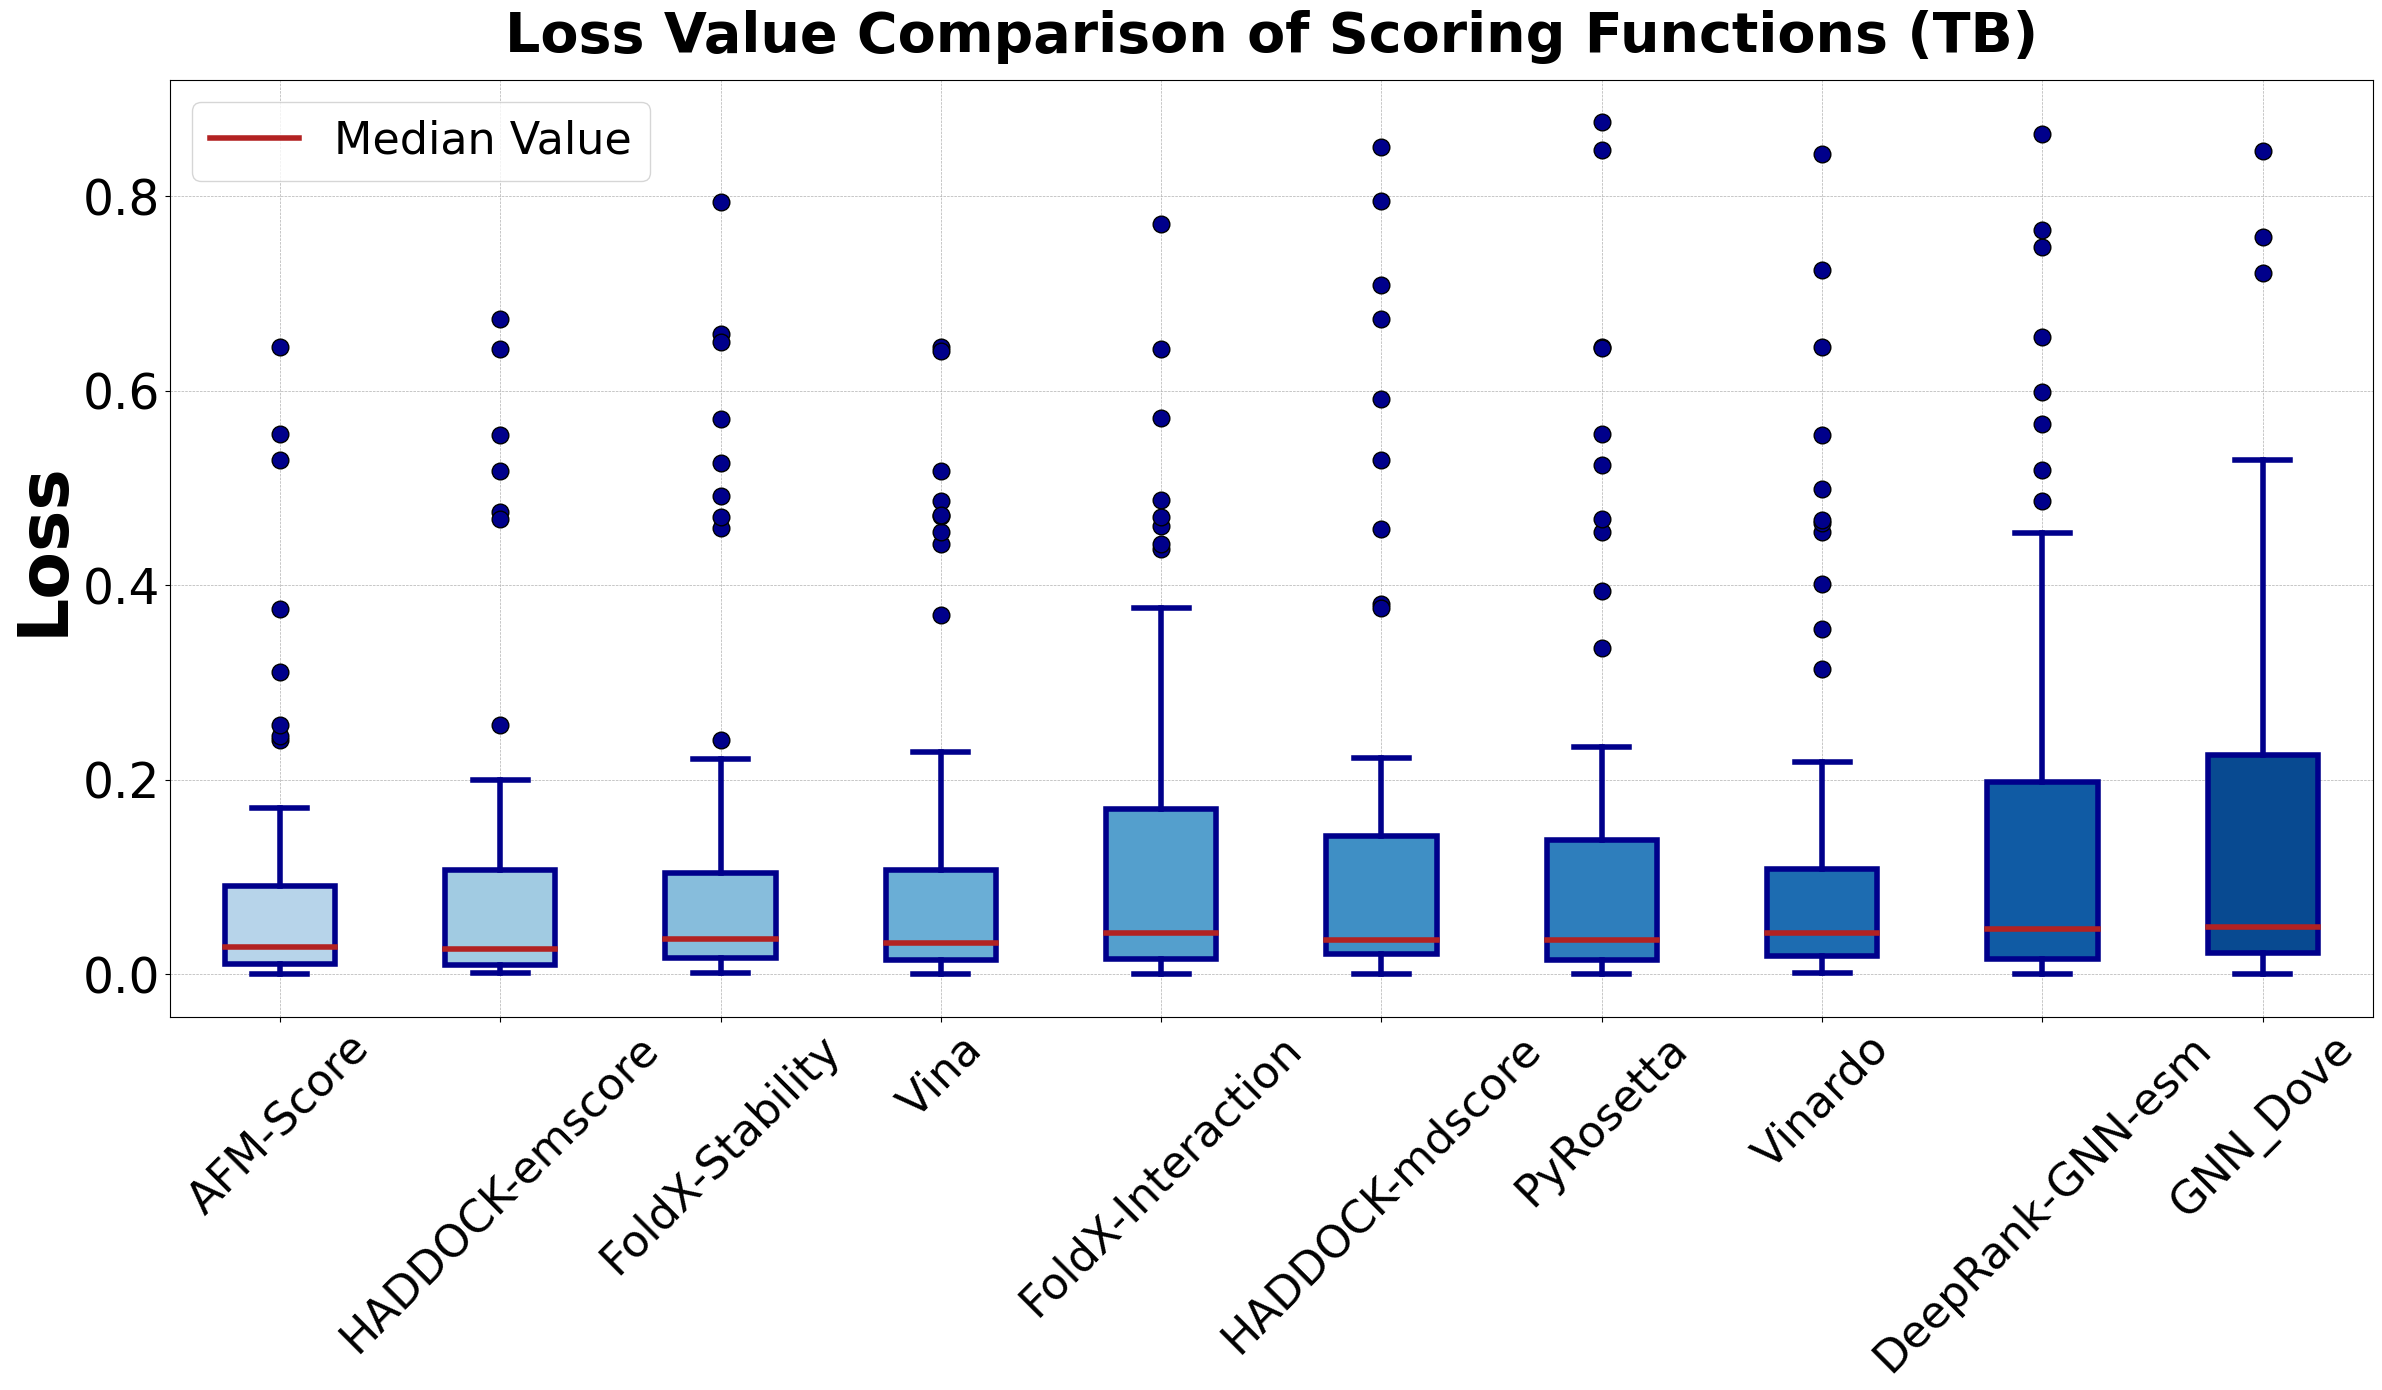

Statistics for each box in the plot:

AFM-Score:
Mean: 0.08695541308788478
Median: 0.028176723638076273
Q1 (25th percentile): 0.010520286086441092
Q3 (75th percentile): 0.09099643371135557
IQR: 0.08047614762491448
Minimum: 0.000154594958158949
Maximum: 0.6446476925764134
Spread: 0.6444930976182545

HADDOCK-emscore:
Mean: 0.09887811970244313
Median: 0.02634131808008975
Q1 (25th percentile): 0.010136086077170507
Q3 (75th percentile): 0.10756590071054942
IQR: 0.09742981463337891
Minimum: 0.0009256935780841413
Maximum: 0.6738362292953588
Spread: 0.6729105357172747

FoldX-Stability:
Mean: 0.12094961828792225
Median: 0.03589597710182646
Q1 (25th percentile): 0.016948673437087225
Q3 (75th percentile): 0.10409692264695744
IQR: 0.08714824920987022
Minimum: 0.001117841438496137
Maximum: 0.7944059930214831
Spread: 0.7932881515829869

Vina:
Mean: 0.12110295108101239
Median: 0.03191361506211704
Q1 (25th percentile): 0.015108978053440747
Q3 (75th percentile): 0.10711167635698329
IQR: 0.0920026983035

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

# Set the directory path as specified in the configuration file
directory_path = config['DockQ_Loss_directory_TB']

# Construct file paths
file_paths = {
    'AFM-Score': os.path.join(directory_path, "AlphaFold_TB.xlsx"),
    'PyRosetta': os.path.join(directory_path, "Pyrosetta_TB.xlsx"),
    'FoldX-Stability': os.path.join(directory_path, "Foldx_stability_TB.xlsx"),
    'FoldX-Interaction': os.path.join(directory_path, "Foldx_Interaction_TB.xlsx"),
    'HADDOCK-emscore': os.path.join(directory_path, "Haddock_emscore_TB.xlsx"),
    'HADDOCK-mdscore': os.path.join(directory_path, "Haddock_mdscore_TB.xlsx"),
    'GNN_Dove': os.path.join(directory_path, "gnn_dove_TB.xlsx"),
    'Vina': os.path.join(directory_path, "Vina_loss_TB.xlsx"),
    'Vinardo': os.path.join(directory_path, "Vinardo_loss_TB.xlsx"),
    'DeepRank-GNN-esm': os.path.join(directory_path, "Deep_GNN_TB.xlsx")
}

# Load the data from the Excel files into DataFrames
data_frames = {label: pd.read_excel(path) for label, path in file_paths.items()}

# Prepare the data for plotting
data_to_plot = [df['Loss'].dropna() for df in data_frames.values()]

# Calculate means and sort data by mean values
means = [np.mean(data) for data in data_to_plot]
sorted_indices = np.argsort(means)
data_to_plot_sorted = [data_to_plot[i] for i in sorted_indices]
labels_sorted = [list(data_frames.keys())[i] for i in sorted_indices]

# Create the boxplot
plt.figure(figsize=(24, 14))
boxplot = plt.boxplot(data_to_plot_sorted, labels=labels_sorted, patch_artist=True,
                      boxprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      medianprops=dict(linestyle='-', linewidth=4, color='firebrick'),
                      whiskerprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      capprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      flierprops=dict(marker='o', markerfacecolor='darkblue', markersize=12, linestyle='none'))

# Set colors for each box
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(labels_sorted)))
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Add a legend for the median line
plt.plot([], [], color='firebrick', label='Median Value', linewidth=4)
plt.legend(fontsize=32, loc='upper left')

# Set titles and labels with increased font size
plt.title('Loss Value Comparison of Scoring Functions (TB)', fontsize=40, fontweight='bold', pad=20)
plt.ylabel('Loss', fontsize=50, fontweight='bold')
#plt.xlabel('Scoring Functions', fontsize=37, fontweight='bold')
plt.xticks(rotation=45, fontsize=32)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Define save path and save the plot
save_path = f"{config['Main_Figures_directory']}/Fig_5c.png"
plt.savefig(save_path, dpi=1000, facecolor='white')

plt.show()

# Print statistics for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels_sorted, data_to_plot_sorted):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")

# Answering the questions
print("\nThe red line in each box plot represents the median value of the data.")
print("The plot is sorted based on the mean values of the 'Loss' data for each scoring function.")


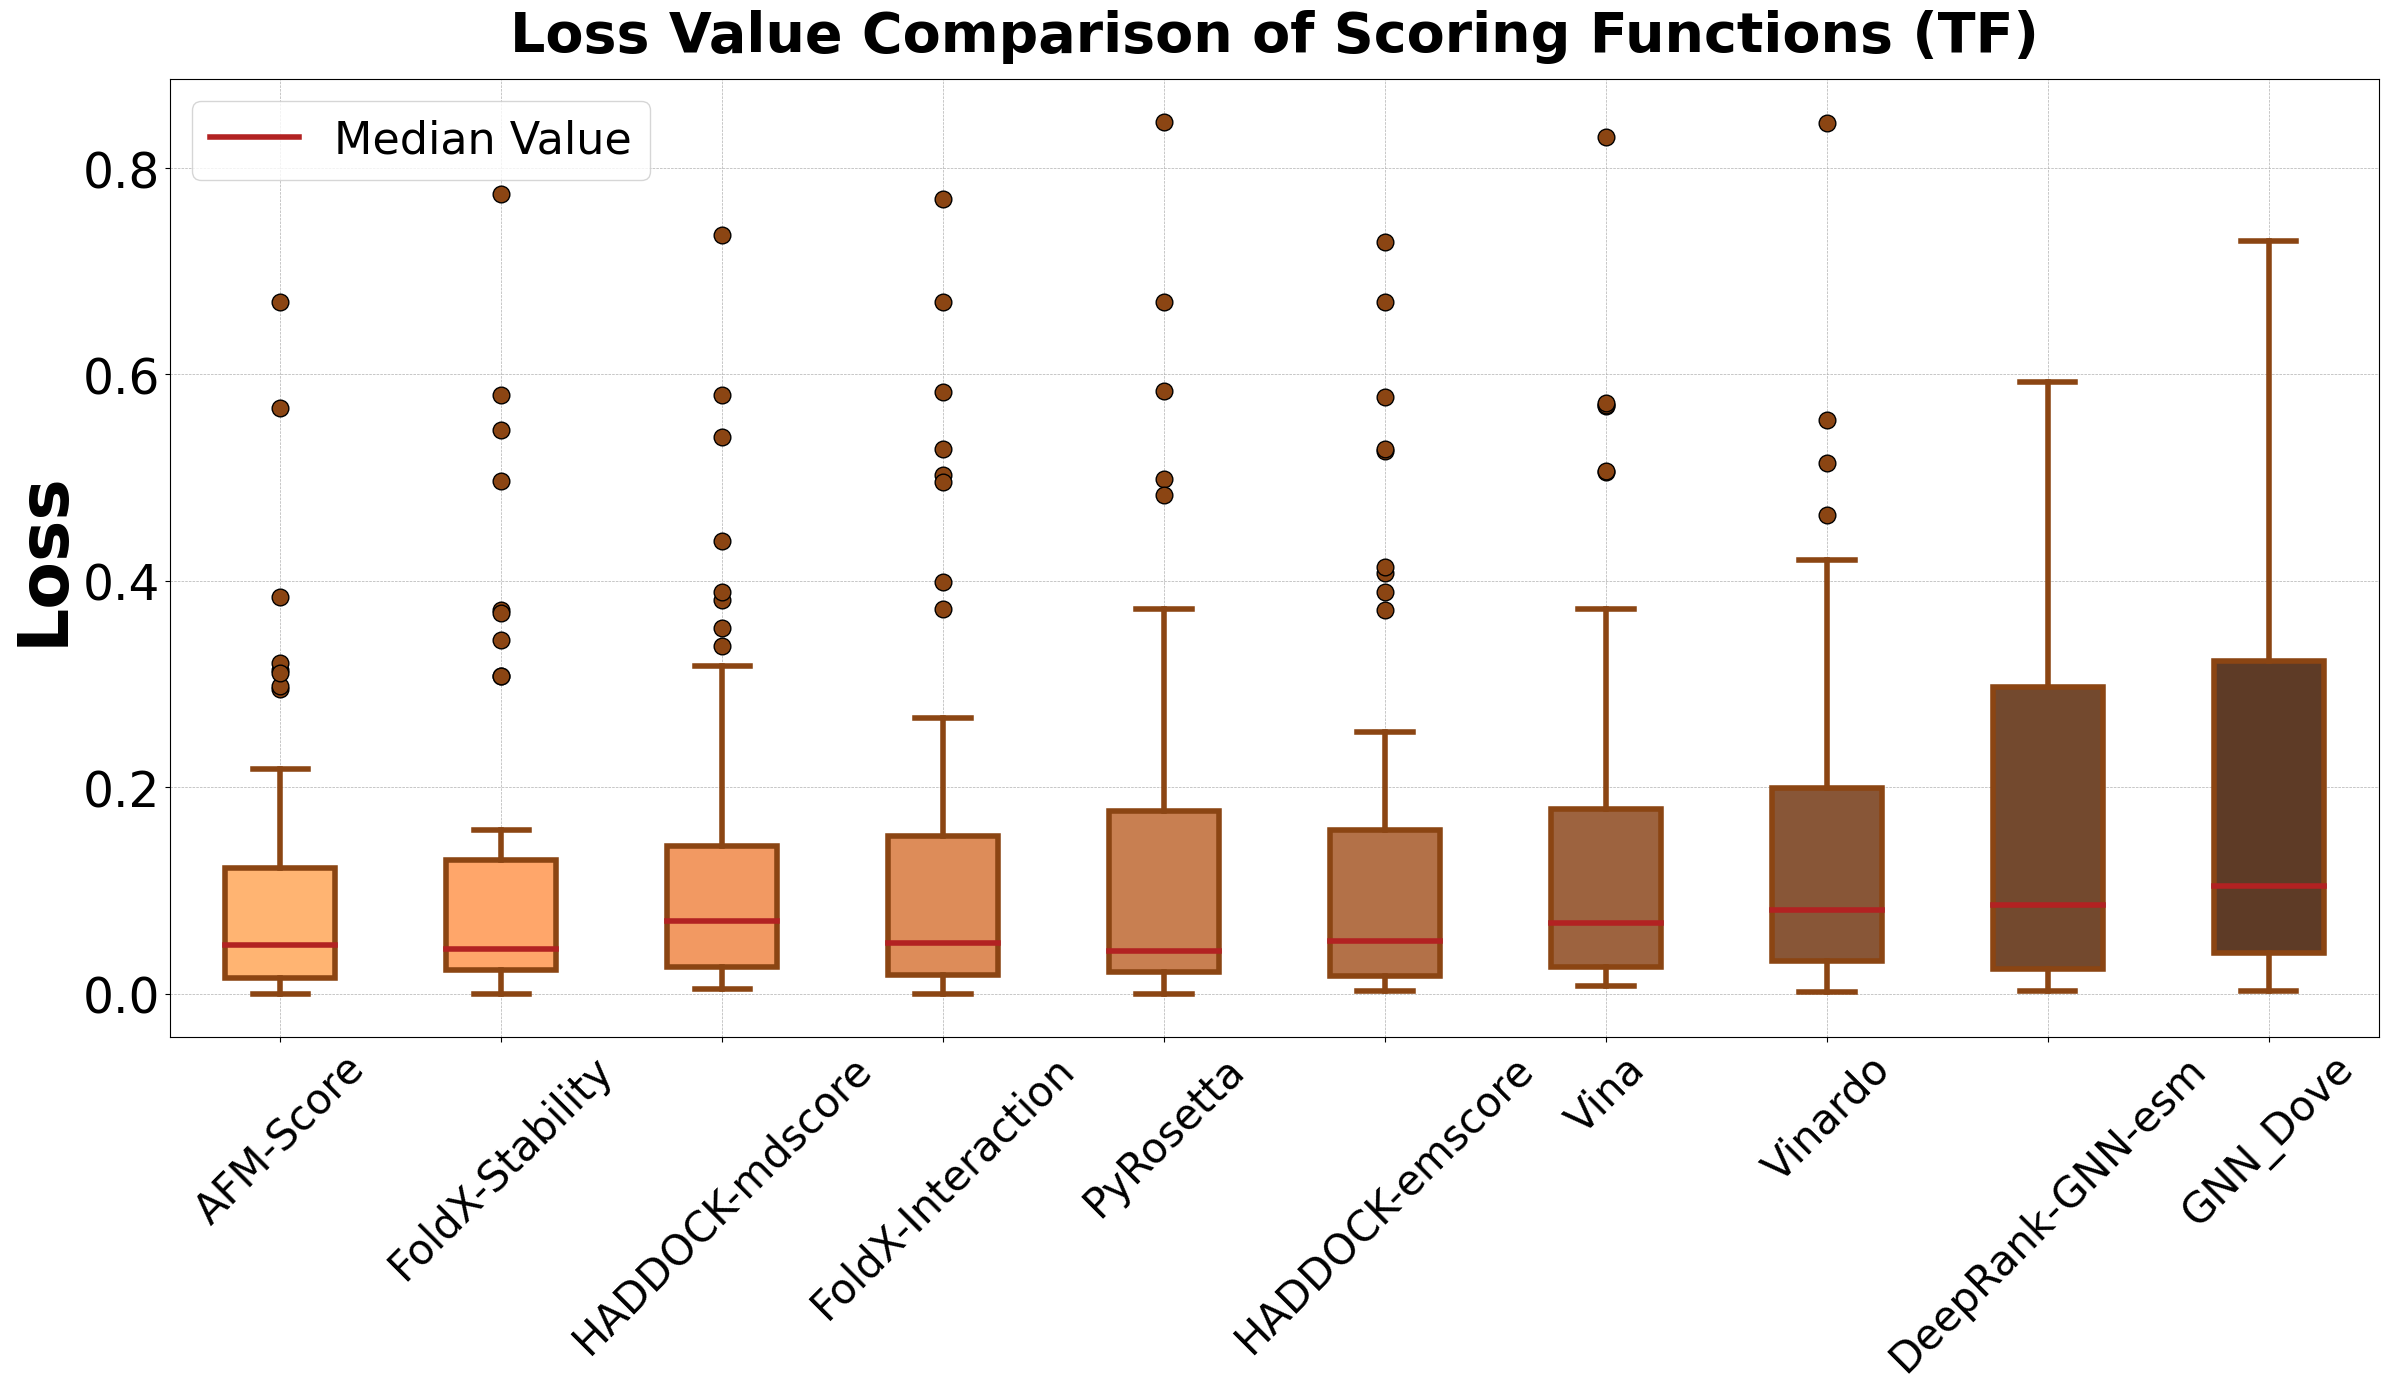

Statistics for each box in the plot:

AFM-Score:
Mean: 0.10076800975319862
Median: 0.04724999396555302
Q1 (25th percentile): 0.014680210629689135
Q3 (75th percentile): 0.121193807191145
IQR: 0.10651359656145587
Minimum: 0.0
Maximum: 0.670019373571165
Spread: 0.670019373571165

FoldX-Stability:
Mean: 0.11411584314264916
Median: 0.04317990047142484
Q1 (25th percentile): 0.02274730558105453
Q3 (75th percentile): 0.12976041580528236
IQR: 0.10701311022422783
Minimum: 0.0
Maximum: 0.7743416504277025
Spread: 0.7743416504277025

HADDOCK-mdscore:
Mean: 0.12819525592149736
Median: 0.07074149287437827
Q1 (25th percentile): 0.02594061416550074
Q3 (75th percentile): 0.14323939799710278
IQR: 0.11729878383160204
Minimum: 0.004554903685956013
Maximum: 0.7346295828564205
Spread: 0.7300746791704645

FoldX-Interaction:
Mean: 0.1311978155072352
Median: 0.0493366431336234
Q1 (25th percentile): 0.018130878852830375
Q3 (75th percentile): 0.15281851017523657
IQR: 0.1346876313224062
Minimum: 0.0
Maximum: 0.770

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

directory_path = config['DockQ_Loss_directory_TF']

# Define paths for each scoring function's Excel file
scoring_files = {
    'AFM-Score': os.path.join(directory_path, "AlphaFold_TF.xlsx"),
    'PyRosetta': os.path.join(directory_path, "Pyrosetta_TF.xlsx"),
    'FoldX-Stability': os.path.join(directory_path, "Foldx_stability_TF.xlsx"),
    'FoldX-Interaction': os.path.join(directory_path, "Foldx_Interaction_TF.xlsx"),
    'HADDOCK-emscore': os.path.join(directory_path, "Haddock_emscore_TF.xlsx"),
    'HADDOCK-mdscore': os.path.join(directory_path, "Haddock_mdscore_TF.xlsx"),
    'GNN_Dove': os.path.join(directory_path, "gnn_dove_TF.xlsx"),
    'Vina': os.path.join(directory_path, "Vina_loss_TF.xlsx"),
    'Vinardo': os.path.join(directory_path, "Vinardo_loss_TF.xlsx"),
    'DeepRank-GNN-esm': os.path.join(directory_path, "Deep_GNN_TF.xlsx")
}

# Extract loss values from each Excel file
data_to_plot = []
labels = []
for label, path in scoring_files.items():
    df = pd.read_excel(path)
    loss_data = df['Loss'].dropna()
    data_to_plot.append(loss_data)
    labels.append(label)

# Calculate means and sort data by mean values
means = [np.mean(data) for data in data_to_plot]
sorted_indices = np.argsort(means)
data_to_plot_sorted = [data_to_plot[i] for i in sorted_indices]
labels_sorted = [labels[i] for i in sorted_indices]

# Plot configuration and generation
plt.figure(figsize=(24, 14))
colors = plt.cm.copper(np.linspace(0.9, 0.3, len(labels_sorted)))
boxprops = dict(linestyle='-', linewidth=4, color='#8B4513')
medianprops = dict(linestyle='-', linewidth=4, color='firebrick')
whiskerprops = dict(linestyle='-', linewidth=4, color='#8B4513')
capprops = dict(linestyle='-', linewidth=4, color='#8B4513')
flierprops = dict(marker='o', markerfacecolor='#8B4513', markersize=12, linestyle='none')
boxplot = plt.boxplot(data_to_plot_sorted, labels=labels_sorted, patch_artist=True,
                      boxprops=boxprops, medianprops=medianprops,
                      whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Add a legend for the median line
plt.plot([], [], color='firebrick', label='Median Value', linewidth=4)
plt.legend(fontsize=32, loc='upper left')

# Set titles and labels with increased font size
plt.title('Loss Value Comparison of Scoring Functions (TF)', fontsize=40, fontweight='bold', pad=20)
plt.ylabel('Loss', fontsize=50, fontweight='bold')
#plt.xlabel('Scoring Functions', fontsize=50, fontweight='bold')
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the figure
save_path = f"{config['Main_Figures_directory']}/Fig_5d.png"
plt.savefig(save_path, dpi=1000, facecolor='white')
plt.show()

# Print statistics for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels_sorted, data_to_plot_sorted):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")


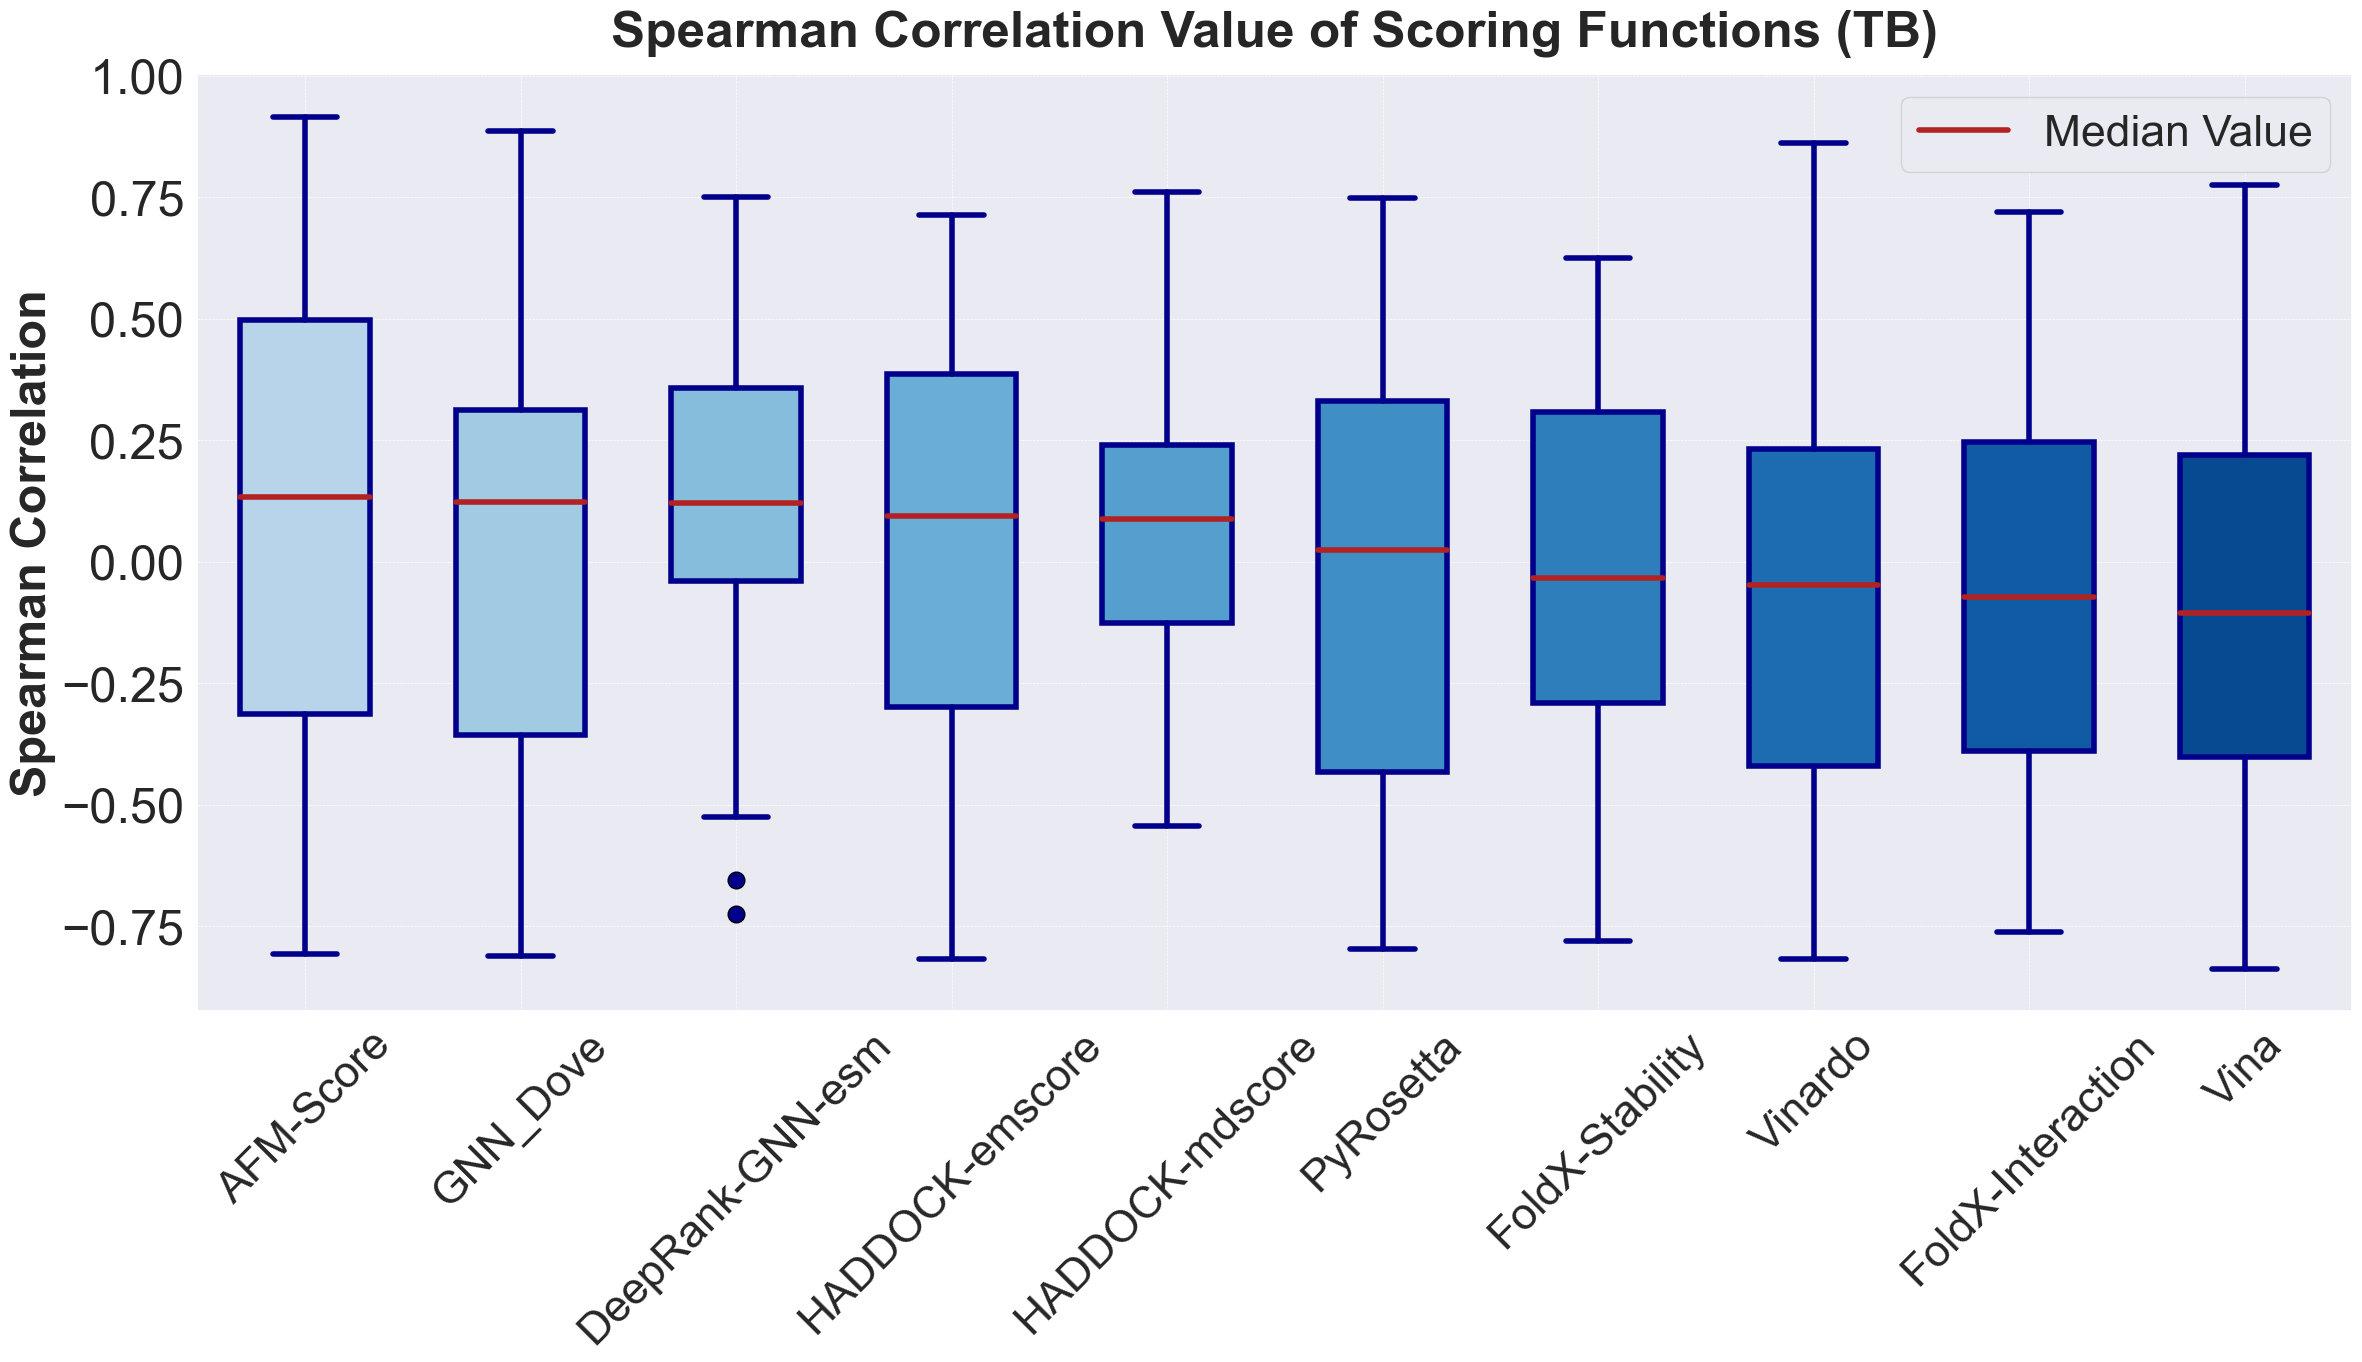

Statistics for each box in the plot:

AFM-Score:
Median: 0.13266709266709265
Q1 (25th percentile): -0.3123851823851824
Q3 (75th percentile): 0.496914376914377
IQR: 0.8092995592995594
Minimum: -0.8066655866655866
Maximum: 0.9153903393903395
Spread: 1.7220559260559263

GNN_Dove:
Median: 0.1227548667548668
Q1 (25th percentile): -0.3568202788202788
Q3 (75th percentile): 0.31278709878709887
IQR: 0.6696073776073777
Minimum: -0.8109765669765671
Maximum: 0.8873256713256714
Spread: 1.6983022383022384

DeepRank-GNN-esm:
Median: 0.12037041664095771
Q1 (25th percentile): -0.04015042315042315
Q3 (75th percentile): 0.35803144003144
IQR: 0.39818186318186316
Minimum: -0.7253986853986855
Maximum: 0.7507319587319589
Spread: 1.4761306441306443

HADDOCK-emscore:
Median: 0.0941991581991582
Q1 (25th percentile): -0.29952674652674655
Q3 (75th percentile): 0.385969177969178
IQR: 0.6854959244959246
Minimum: -0.8180019980019981
Maximum: 0.71405073005073
Spread: 1.532052728052728

HADDOCK-mdscore:
Median: 0.0882

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json  # Importing JSON for configuration


# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

directory_path = config['Spearman_Correlation_directory_TB']

# Construct file paths
file_paths = {
    "spearman_correlation_AF_TB.xlsx": "AFM-Score",
    "spearman_correlation_Pyrosetta_TB.xlsx": "PyRosetta",
    "correlations_stability_TB.xlsx": "FoldX-Stability",
    "correlations_Interaction_TB.xlsx": "FoldX-Interaction",
    "correlations_hadd_em_TB.xlsx": "HADDOCK-emscore",
    "correlations_hadd_md_TB.xlsx": "HADDOCK-mdscore",
    "correlations_gnn_dove_TB.xlsx": "GNN_Dove",
    "correlations_vina_TB.xlsx": "Vina",
    "correlations_vinardo_TB.xlsx": "Vinardo",
    "correlations_Deep_GNN_TB.xlsx": "DeepRank-GNN-esm"
}

# Load data and prepare for plotting
data_with_labels = []
for file_name, label in file_paths.items():
    file_path = os.path.join(directory_path, file_name)
    df = pd.read_excel(file_path)
    data_series = df['Spearman Correlation'].dropna()
    median = data_series.median()
    iqr = data_series.quantile(0.75) - data_series.quantile(0.25)
    data_with_labels.append((data_series, label, median, iqr))

# Sort data based on median and IQR
data_with_labels.sort(key=lambda x: (-x[2], x[3]))

# Unzip the sorted data and labels for plotting
data_to_plot, labels, _, _ = zip(*data_with_labels)

# Define a gradient of blue colors (darker for higher medians)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(labels)))  # Reversed order for darker to lighter

# Create the boxplot with updated settings for visual clarity
plt.figure(figsize=(24, 14), facecolor='white')

# Generate boxplot with a gradient of colors and increased box widths
for i, data in enumerate(data_to_plot):
    plt.boxplot(data, positions=[i + 1], patch_artist=True, widths=0.6,
                boxprops=dict(facecolor=colors[i], linestyle='-', linewidth=4, color='darkblue'),
                medianprops=dict(linestyle='-', linewidth=4, color='firebrick'),
                whiskerprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                capprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                flierprops=dict(marker='o', markerfacecolor='darkblue', markersize=12, linestyle='none'),
                labels=[labels[i]])  # Removed the ranking number

# Add a legend for the median line
plt.plot([], [], color='firebrick', label='Median Value', linewidth=4)
plt.legend(fontsize=32, loc='upper right')

# Title and labels
plt.title('Spearman Correlation Value of Scoring Functions (TB)', fontsize=37, fontweight='bold', pad=20)
plt.ylabel('Spearman Correlation', fontsize=35, fontweight='bold')
plt.xticks(rotation=45, fontsize=32)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()

# Define save path
save_path = f"{config['Main_Figures_directory']}/Fig_5e.png"
plt.savefig(save_path, dpi=1000, facecolor='white')

plt.show()

# Print median, IQR, min, max, and spread for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels, data_to_plot):
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")

# Answering the questions
print("\nThe red line in each box plot represents the median value of the data.")
print("The plot is sorted based on the median values of the 'SP_Corr' data for each scoring function.")



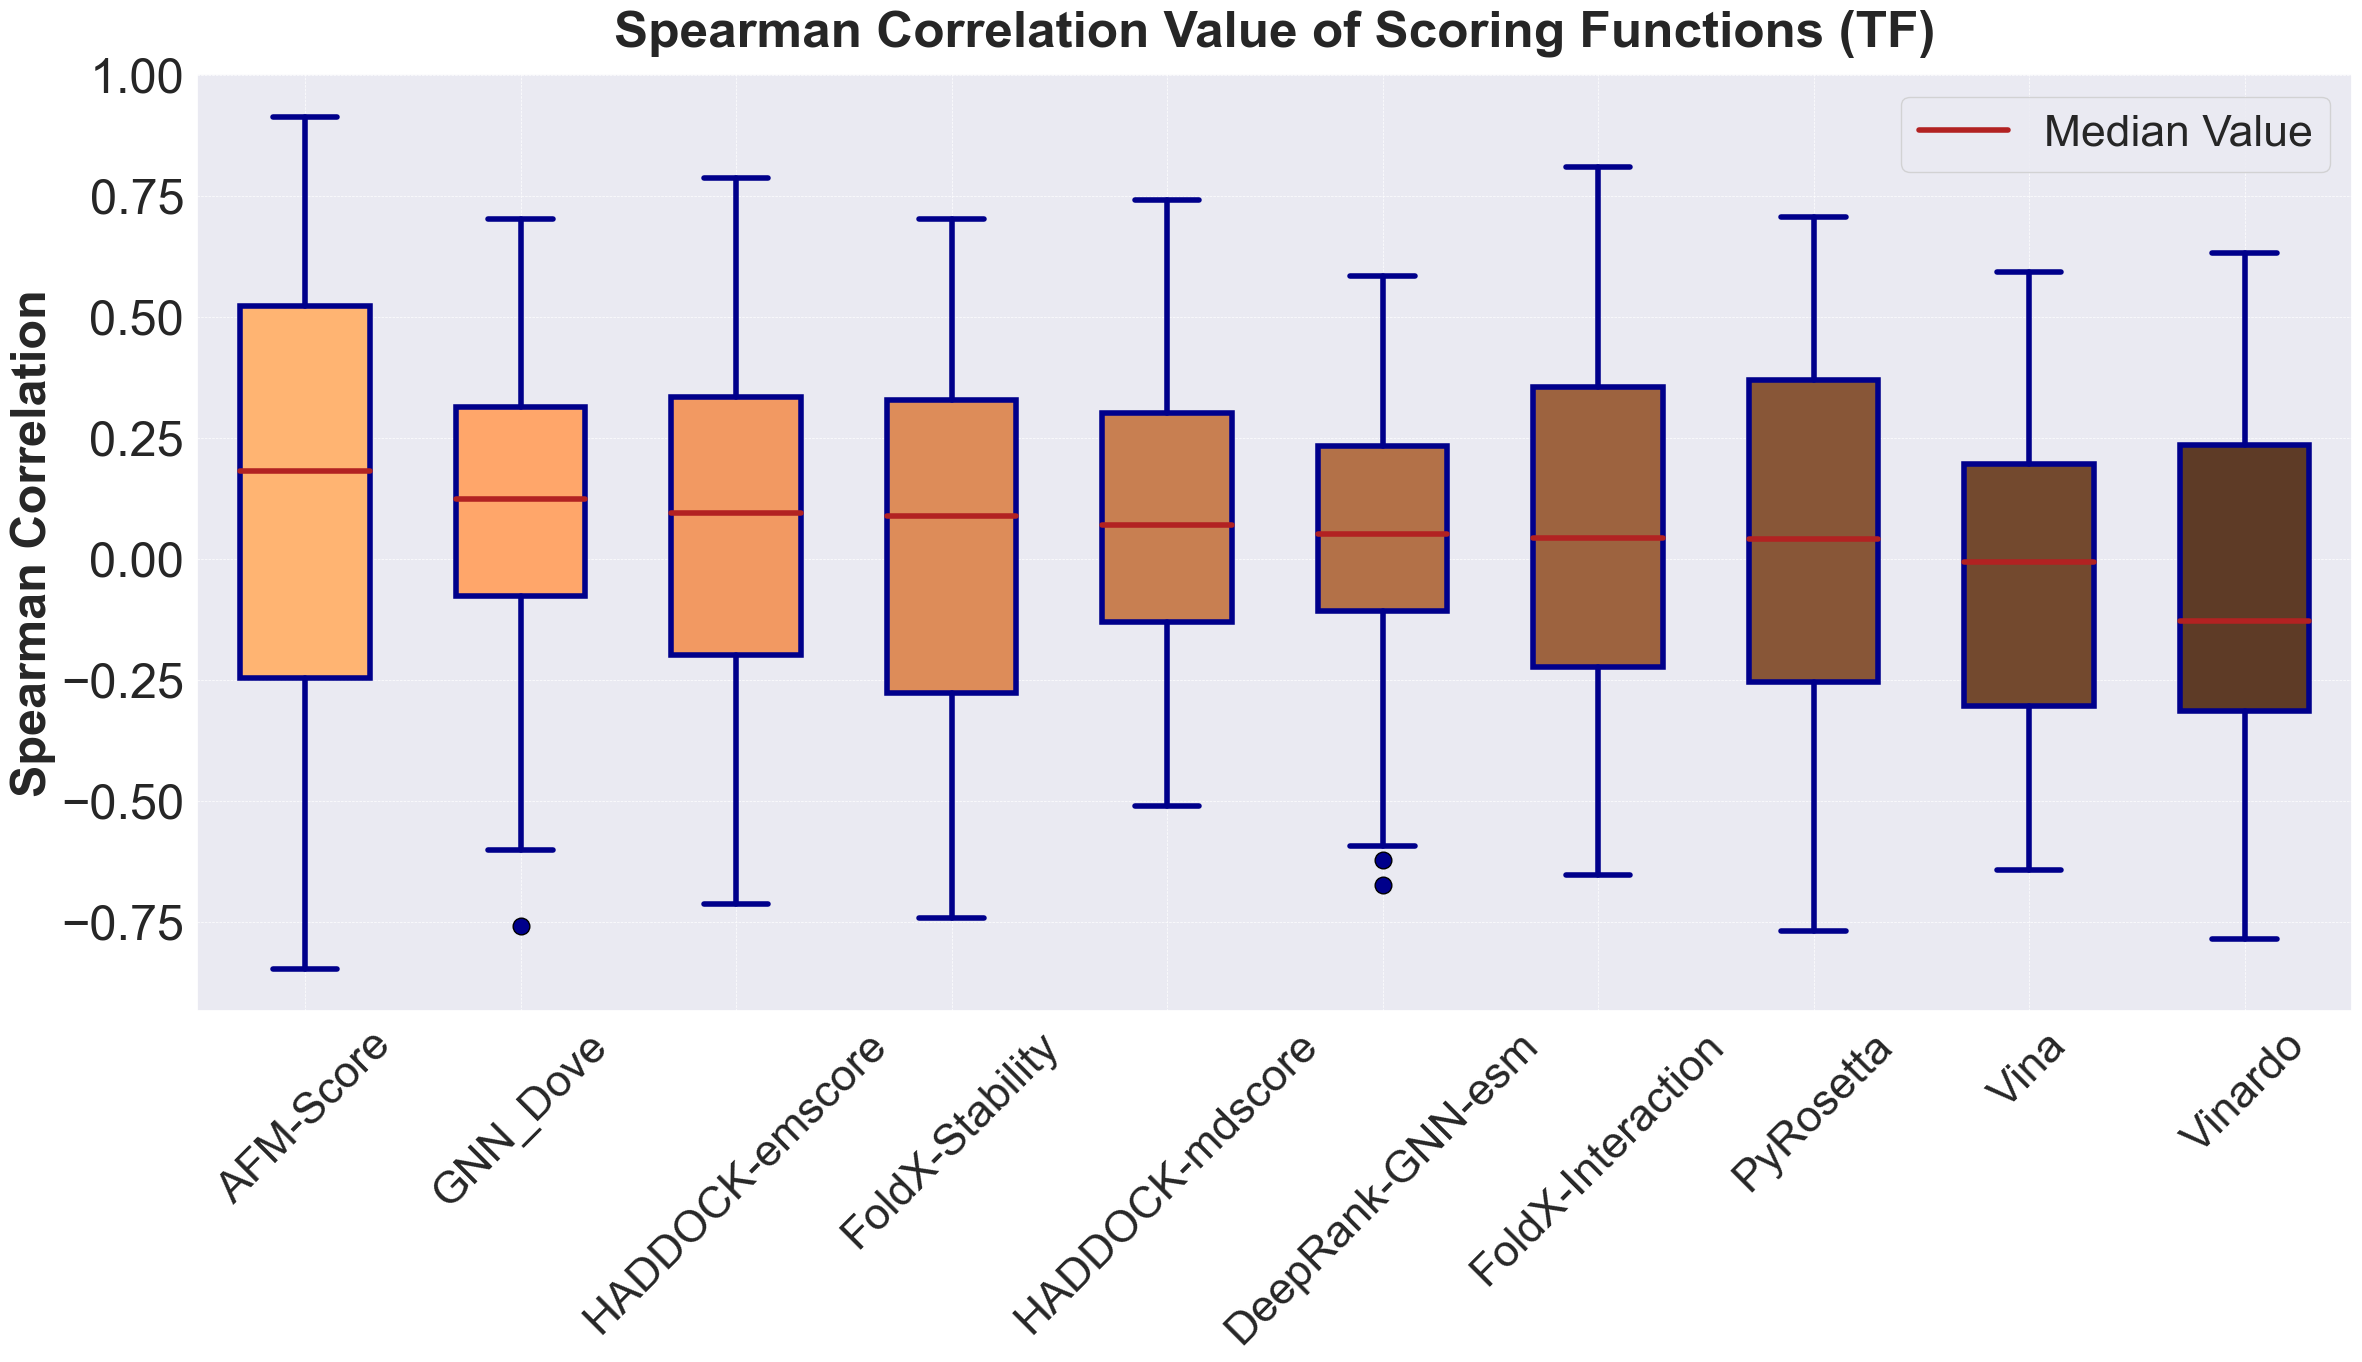

Statistics for each box in the plot:

AFM-Score:
Median: 0.18214244014244013
Q1 (25th percentile): -0.246952518952519
Q3 (75th percentile): 0.5214089904089905
IQR: 0.7683615093615095
Minimum: -0.8473454593454595
Maximum: 0.912828180828181
Spread: 1.7601736401736403

GNN_Dove:
Median: 0.1226135546135546
Q1 (25th percentile): -0.07625663825663825
Q3 (75th percentile): 0.31451490251490255
IQR: 0.3907715407715408
Minimum: -0.7591467631467632
Maximum: 0.7010965370965372
Spread: 1.4602433002433004

HADDOCK-emscore:
Median: 0.09431205431205433
Q1 (25th percentile): -0.19793520293520298
Q3 (75th percentile): 0.3333586203586204
IQR: 0.5312938232938234
Minimum: -0.7142588342588343
Maximum: 0.785983385983386
Spread: 1.5002422202422203

FoldX-Stability:
Median: 0.0875938355938356
Q1 (25th percentile): -0.2770733710733711
Q3 (75th percentile): 0.32853295053295056
IQR: 0.6056063216063217
Minimum: -0.7428359148359149
Maximum: 0.7011253011253011
Spread: 1.443961215961216

HADDOCK-mdscore:
Median: 0.06

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported
import os  # For path operations
import json

# Assume directory_path is already known or provided by the user
# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

directory_path = config['Spearman_Correlation_directory_TF']

# Define file paths and corresponding labels in a dictionary
file_paths = {
    "spearman_correlation_AF_TF.xlsx": "AFM-Score",
    "spearman_correlation_Pyrosetta_TF.xlsx": "PyRosetta",
    "correlations_stability_TF.xlsx": "FoldX-Stability",
    "correlations_Interaction_TF.xlsx": "FoldX-Interaction",
    "correlations_hadd_em_TF.xlsx": "HADDOCK-emscore",
    "correlations_hadd_md_TF.xlsx": "HADDOCK-mdscore",
    "correlations_gnn_dove_TF.xlsx": "GNN_Dove",
    "correlations_vina_TF.xlsx": "Vina",
    "correlations_vinardo_TF.xlsx": "Vinardo",
    "correlations_Deep_GNN_TF.xlsx": "DeepRank-GNN-esm"
}

# Load data and prepare for plotting
data_with_labels = []
for file_name, label in file_paths.items():
    file_path = os.path.join(directory_path, file_name)
    df = pd.read_excel(file_path)
    data_series = df['Spearman Correlation'].dropna()
    median = data_series.median()
    iqr = data_series.quantile(0.75) - data_series.quantile(0.25)
    data_with_labels.append((data_series, label, median, iqr))

# Sort data based on median and then by IQR
data_with_labels.sort(key=lambda x: (-x[2], x[3]))  # Sort primarily by median (desc), secondarily by IQR (asc)

# Unzip the sorted data for plotting
data_to_plot, labels, _, _ = zip(*data_with_labels)

# Define a gradient of brown colors (lighter for higher medians)
colors = plt.cm.copper(np.linspace(0.9, 0.3, len(data_to_plot)))  # Light to dark brown

# Create the boxplot with updated settings for visual clarity
plt.figure(figsize=(24, 14), facecolor='white')

# Generate boxplot with a gradient of colors
for i, data in enumerate(data_to_plot):
    plt.boxplot(data, positions=[i + 1], widths=0.6, patch_artist=True,
                boxprops=dict(facecolor=colors[i], linestyle='-', linewidth=4, color='darkblue'),
                medianprops=dict(linestyle='-', linewidth=4, color='firebrick'),
                whiskerprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                capprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                flierprops=dict(marker='o', markerfacecolor='darkblue', markersize=12, linestyle='none'),
                labels=[f"{labels[i]}"])

# Add a legend for the median line
plt.plot([], [], color='firebrick', label='Median Value', linewidth=4)
plt.legend(fontsize=32, loc='upper right')  # Position legend in the upper right corner

# Title and labels
plt.title('Spearman Correlation Value of Scoring Functions (TF)', fontsize=37, fontweight='bold', pad=20)
plt.ylabel('Spearman Correlation', fontsize=35, fontweight='bold')
plt.xticks(rotation=45, fontsize=32)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()

# Define save path
save_path = f"{config['Main_Figures_directory']}/SP_TF.png"
plt.savefig(save_path, dpi=1000, facecolor='white')  # Save the figure with 1000 dpi for high-quality output

plt.show()

# Print median, IQR, min, max, and spread for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels, data_to_plot):
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")

# Answering the questions
print("\nThe red line in each box plot represents the median value of the data.")
print("The plot is sorted based on the median values of the 'SP_Corr' data for each scoring function.")



In [ ]:
import os
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define the path to the directory containing the Excel files
directory_path = '/Users/neginmanshour/Desktop/PpEv/Analysis/Heatmaps_Spearman_Correlation/Data/combined_TB_TF_top20_md'
output_directory = '/Users/neginmanshour/Desktop/PpEv/Analysis/Heatmaps_Spearman_Correlation/Data/Output_TB_TF_venn'
output_file = os.path.join(output_directory, 'common_models_md_20.xlsx')
image_output_path = os.path.join(output_directory, 'venn_diagram_fig_6_final.png')

# Define the scoring function column names
scoring_functions = ['AlphaFold Rank', 'Fold_S Rank', 'Hadd_md Rank']

# Initialize a dictionary to store models for each scoring function
all_models = {func: set() for func in scoring_functions}

# Function to add models to respective sets
def merge_models(df):
    for func in scoring_functions:
        all_models[func].update(df[func].dropna().unique())

# Iterate over all Excel files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_excel(file_path)
        merge_models(df)

# Calculate common models among all three scoring functions
common_all_three = set.intersection(*[all_models[func] for func in scoring_functions])

# Save the common models to an Excel file
common_models_df = pd.DataFrame(list(common_all_three), columns=['File name'])
common_models_df.to_excel(output_file, index=False)

# Plot the Venn diagram with custom colors
plt.figure(figsize=(8, 8))
venn = venn3([all_models[func] for func in scoring_functions], set_labels=None)

# Set custom text labels and font size
labels = {
    '100': 'AFM-Score',
    '010': 'FoldX-Stability',
    '001': 'HADDOCK-mdscore',
    '110': 'AFM/Foldx',
    '101': 'AFM/MD',
    '011': 'Foldx/MD',
    '111': 'com-3'
}
for label_id, label_text in labels.items():
    venn.get_label_by_id(label_id).set_text(label_text)
    venn.get_label_by_id(label_id).set_fontsize(15)  # Change font size here

# Change the color of each circle
venn.get_patch_by_id('100').set_color('#ff9999')
venn.get_patch_by_id('010').set_color('#66b3ff')
venn.get_patch_by_id('001').set_color('#99ff99')

plt.title('Common Models Among three Scoring Functions', fontsize=18, fontweight='bold')

# Save the figure
plt.savefig(image_output_path, facecolor='white', bbox_inches='tight')

plt.show()

print(f"Common models among all three scoring functions have been saved to {output_file}")
print(f"Venn diagram image has been saved to {image_output_path}")



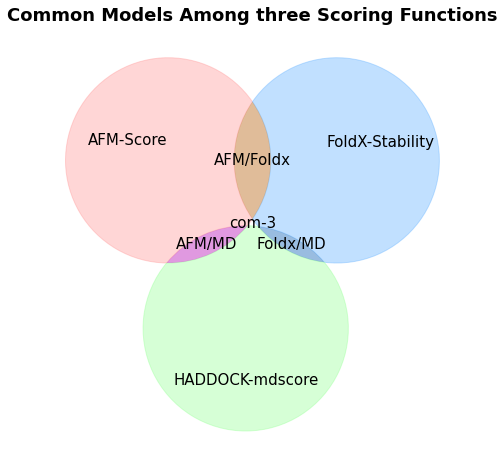

Common models among all three scoring functions have been saved to /Users/neginmanshour/Desktop/PpEv/Analysis/Heatmaps_Spearman_Correlation/Data/Output_TB_TF_venn/common_models_md_20.xlsx
Venn diagram image has been saved to /Users/neginmanshour/Desktop/PpEv/Figures/Main/Fig_6a.png


In [3]:
import os
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

# Assume config is already loaded with necessary paths
# Define the path to the directory containing the Excel files
directory_path = config["combined_directory"]  # Use the loaded config for directory path
output_directory = config["common_outputs"]
output_file = os.path.join(output_directory, 'common_models_md_20.xlsx')
image_output_path = os.path.join(config["Main_Figures_directory"], 'Fig_6a.png')

# Define the scoring function column names
scoring_functions = ['AlphaFold Rank', 'Fold_S Rank', 'Hadd_md Rank']

# Initialize a dictionary to store models for each scoring function
all_models = {func: set() for func in scoring_functions}

# Function to add models to respective sets
def merge_models(df):
    for func in scoring_functions:
        all_models[func].update(df[func].dropna().unique())

# Iterate over all Excel files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_excel(file_path)
        merge_models(df)

# Calculate common models among all three scoring functions
common_all_three = set.intersection(*[all_models[func] for func in scoring_functions])

# Save the common models to an Excel file
common_models_df = pd.DataFrame(list(common_all_three), columns=['File name'])
common_models_df.to_excel(output_file, index=False)

# Plot the Venn diagram with custom colors
plt.figure(figsize=(8, 8))
venn = venn3([all_models[func] for func in scoring_functions], set_labels=None)

# Set custom text labels and font size
labels = {
    '100': 'AFM-Score',
    '010': 'FoldX-Stability',
    '001': 'HADDOCK-mdscore',
    '110': 'AFM/Foldx',
    '101': 'AFM/MD',
    '011': 'Foldx/MD',
    '111': 'com-3'
}
for label_id, label_text in labels.items():
    venn.get_label_by_id(label_id).set_text(label_text)
    venn.get_label_by_id(label_id).set_fontsize(15)  # Change font size here

# Change the color of each circle
venn.get_patch_by_id('100').set_color('#ff9999')
venn.get_patch_by_id('010').set_color('#66b3ff')
venn.get_patch_by_id('001').set_color('#99ff99')

plt.title('Common Models Among three Scoring Functions', fontsize=18, fontweight='bold')

# Save the figure
plt.savefig(image_output_path, facecolor='white', bbox_inches='tight')

plt.show()

print(f"Common models among all three scoring functions have been saved to {output_file}")
print(f"Venn diagram image has been saved to {image_output_path}")


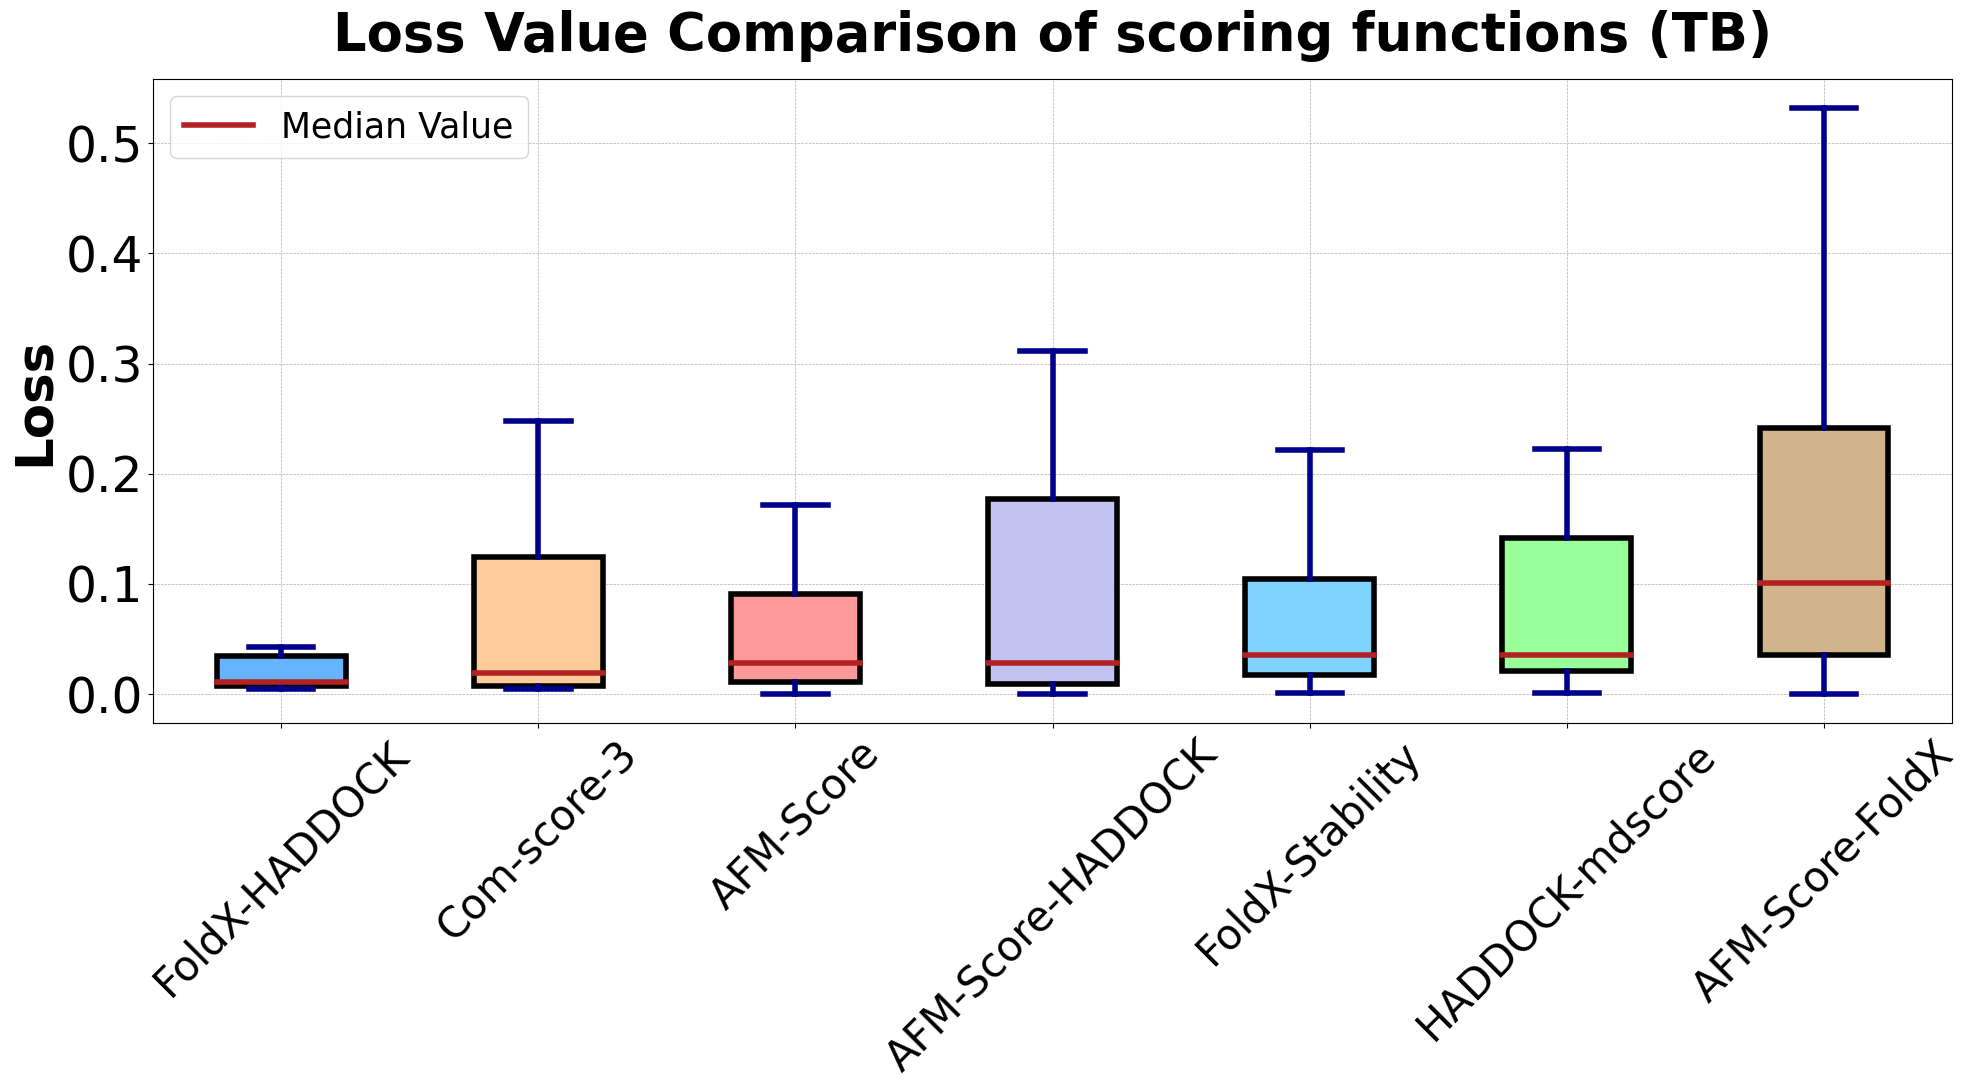

Statistics for each box in the plot:

FoldX-HADDOCK:
Mean: 0.019346712700921736
Median: 0.010784673102734675
Q1 (25th percentile): 0.007268325441482953
Q3 (75th percentile): 0.03473330249338391
IQR: 0.027464977051900957
Minimum: 0.004884085706674757
Maximum: 0.04273218085851282
Spread: 0.03784809515183806

Com-score-3:
Mean: 0.07491396488004486
Median: 0.019494285983755244
Q1 (25th percentile): 0.007193297663786596
Q3 (75th percentile): 0.12396555383055881
IQR: 0.11677225616677221
Minimum: 0.004494022476226545
Maximum: 0.2475741716179107
Spread: 0.24308014914168416

AFM-Score:
Mean: 0.08695541308788478
Median: 0.028176723638076273
Q1 (25th percentile): 0.010520286086441092
Q3 (75th percentile): 0.09099643371135557
IQR: 0.08047614762491448
Minimum: 0.000154594958158949
Maximum: 0.6446476925764134
Spread: 0.6444930976182545

AFM-Score-HADDOCK:
Mean: 0.10016483353844396
Median: 0.027928022311011103
Q1 (25th percentile): 0.009469011457228841
Q3 (75th percentile): 0.17709976184347248
IQR: 0

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

# Set the directory path as specified in the configuration file
directory_path = config['Loss_consensus_TB']

# Construct file paths
file_paths = {
    'AFM-Score': os.path.join(directory_path, "AlphaFold_TB.xlsx"),
    'FoldX-Stability': os.path.join(directory_path, "Foldx_stability_TB.xlsx"),
    'HADDOCK-mdscore': os.path.join(directory_path, "Haddock_mdscore_TB.xlsx"),
    'Com-score-3': os.path.join(directory_path, "updated_common_models_final_md_20.xlsx"),
    'AFM-Score-FoldX': os.path.join(directory_path, "updated_common_models_af_foldx_final.xlsx"),
    'AFM-Score-HADDOCK': os.path.join(directory_path, "updated_common_models_af_haddock_final.xlsx"),
    'FoldX-HADDOCK': os.path.join(directory_path, "updated_common_models_foldx_haddock_final.xlsx")
}

# Load the data from the Excel files into DataFrames
data_frames = {label: pd.read_excel(path) for label, path in file_paths.items()}

# Prepare the data for plotting
data_to_plot = [df['Loss'].dropna() for df in data_frames.values()]

# Calculate means and sort data by mean values
means = [np.mean(data) for data in data_to_plot]
sorted_indices = np.argsort(means)
data_to_plot_sorted = [data_to_plot[i] for i in sorted_indices]
labels_sorted = [list(data_frames.keys())[i] for i in sorted_indices]

# Create a mapping of labels to colors
color_mapping = {
    'AFM-Score': '#ff9999',  # Pink
    'FoldX-Stability': '#7FD4FF',  # Blue
    'HADDOCK-mdscore': '#99ff99',  # Green
    'Com-score-3': '#ffcc99',  # Orange
    'AFM-Score-FoldX': '#D2B48C',  # Light Purple
    'AFM-Score-HADDOCK': '#c2c2f0',  # Light Pink
    'FoldX-HADDOCK': '#66b3ff'  # Light Green
}

# Create the boxplot
plt.figure(figsize=(20, 11))
boxplot = plt.boxplot(data_to_plot_sorted, labels=labels_sorted, patch_artist=True,
                      showfliers=False,  # This will remove outliers from the plot
                      boxprops=dict(linestyle='-', linewidth=4),
                      medianprops=dict(linestyle='-', linewidth=4, color='firebrick'),
                      whiskerprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      capprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      flierprops=dict(marker='o', markerfacecolor='darkblue', markersize=12, linestyle='none'))

# Set colors for each box based on the sorted labels
for patch, label in zip(boxplot['boxes'], labels_sorted):
    patch.set_facecolor(color_mapping[label])

# Add legend
median_line = plt.Line2D([], [], color='firebrick', linewidth=4, label='Median Value')
plt.legend(handles=[median_line], loc='upper left', fontsize=25)

# Set titles and labels with increased font size
plt.title('Loss Value Comparison of scoring functions (TB)', fontsize=38, fontweight='bold', pad=20)
plt.ylabel('Loss', fontsize=37, fontweight='bold')
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Define save path and save the plot
save_path = f"{config['Main_Figures_directory']}/Fig_6b.png"
plt.savefig(save_path, dpi=1000, facecolor='white')

plt.show()

# Print statistics for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels_sorted, data_to_plot_sorted):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")

# Answering the questions
print("\nThe red line in each box plot represents the median value of the data.")
print("The plot is sorted based on the mean values of the 'Loss' data for each scoring function.")


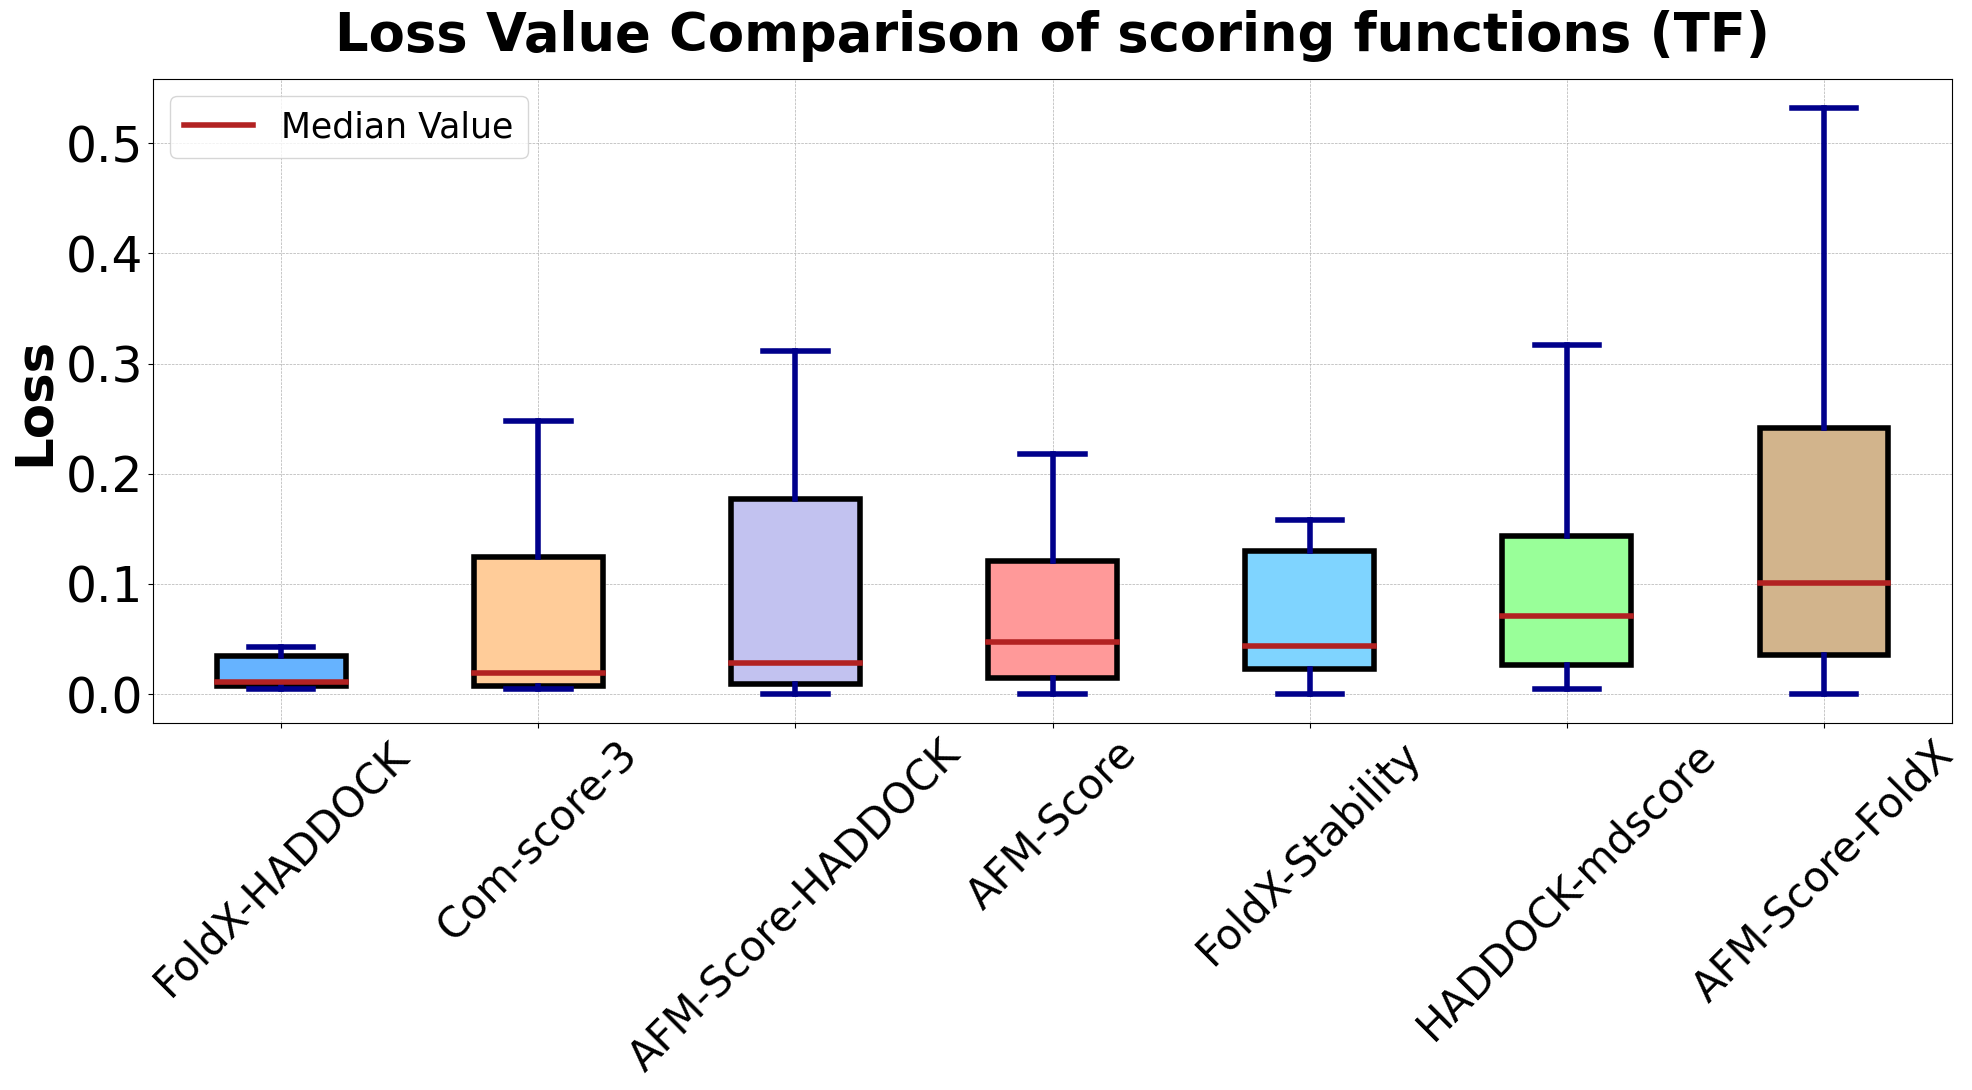

Statistics for each box in the plot:

FoldX-HADDOCK:
Mean: 0.019346712700921736
Median: 0.010784673102734675
Q1 (25th percentile): 0.007268325441482953
Q3 (75th percentile): 0.03473330249338391
IQR: 0.027464977051900957
Minimum: 0.004884085706674757
Maximum: 0.04273218085851282
Spread: 0.03784809515183806

Com-score-3:
Mean: 0.07491396488004486
Median: 0.019494285983755244
Q1 (25th percentile): 0.007193297663786596
Q3 (75th percentile): 0.12396555383055881
IQR: 0.11677225616677221
Minimum: 0.004494022476226545
Maximum: 0.2475741716179107
Spread: 0.24308014914168416

AFM-Score-HADDOCK:
Mean: 0.10016483353844396
Median: 0.027928022311011103
Q1 (25th percentile): 0.009469011457228841
Q3 (75th percentile): 0.17709976184347248
IQR: 0.16763075038624364
Minimum: 0.0
Maximum: 0.5288159673817672
Spread: 0.5288159673817672

AFM-Score:
Mean: 0.10076800975319862
Median: 0.04724999396555302
Q1 (25th percentile): 0.014680210629689135
Q3 (75th percentile): 0.121193807191145
IQR: 0.10651359656145587
M

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

# Set the directory path as specified in the configuration file
directory_path = config['Loss_consensus_TF']

# Construct file paths
file_paths = {
    'AFM-Score': os.path.join(directory_path, "AlphaFold_TF.xlsx"),
    'FoldX-Stability': os.path.join(directory_path, "Foldx_stability_TF.xlsx"),
    'HADDOCK-mdscore': os.path.join(directory_path, "Haddock_mdscore_TF.xlsx"),
    'Com-score-3': os.path.join(directory_path, "updated_common_models_final_md_20.xlsx"),
    'AFM-Score-FoldX': os.path.join(directory_path, "updated_common_models_af_foldx_final.xlsx"),
    'AFM-Score-HADDOCK': os.path.join(directory_path, "updated_common_models_af_haddock_final.xlsx"),
    'FoldX-HADDOCK': os.path.join(directory_path, "updated_common_models_foldx_haddock_final.xlsx")
}

# Load the data from the Excel files into DataFrames
data_frames = {label: pd.read_excel(path) for label, path in file_paths.items()}

# Prepare the data for plotting
data_to_plot = [df['Loss'].dropna() for df in data_frames.values()]

# Calculate means and sort data by mean values
means = [np.mean(data) for data in data_to_plot]
sorted_indices = np.argsort(means)
data_to_plot_sorted = [data_to_plot[i] for i in sorted_indices]
labels_sorted = [list(data_frames.keys())[i] for i in sorted_indices]

# Create a mapping of labels to colors
color_mapping = {
    'AFM-Score': '#ff9999',  # Pink
    'FoldX-Stability': '#7FD4FF',  # Blue
    'HADDOCK-mdscore': '#99ff99',  # Green
    'Com-score-3': '#ffcc99',  # Orange
    'AFM-Score-FoldX': '#D2B48C',  # Light Purple
    'AFM-Score-HADDOCK': '#c2c2f0',  # Light Pink
    'FoldX-HADDOCK': '#66b3ff'  # Light Green
}

# Create the boxplot
plt.figure(figsize=(20, 11))
boxplot = plt.boxplot(data_to_plot_sorted, labels=labels_sorted, patch_artist=True,
                      showfliers=False,  # This will remove outliers from the plot
                      boxprops=dict(linestyle='-', linewidth=4),
                      medianprops=dict(linestyle='-', linewidth=4, color='firebrick'),
                      whiskerprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      capprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      flierprops=dict(marker='o', markerfacecolor='darkblue', markersize=12, linestyle='none'))

# Set colors for each box based on the sorted labels
for patch, label in zip(boxplot['boxes'], labels_sorted):
    patch.set_facecolor(color_mapping[label])

# Add legend
median_line = plt.Line2D([], [], color='firebrick', linewidth=4, label='Median Value')
plt.legend(handles=[median_line], loc='upper left', fontsize=25)

# Set titles and labels with increased font size
plt.title('Loss Value Comparison of scoring functions (TF)', fontsize=38, fontweight='bold', pad=20)
plt.ylabel('Loss', fontsize=37, fontweight='bold')
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Define save path and save the plot
save_path = f"{config['Main_Figures_directory']}/Fig_6c.png"
plt.savefig(save_path, dpi=1000, facecolor='white')

plt.show()

# Print statistics for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels_sorted, data_to_plot_sorted):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")

# Answering the questions
print("\nThe red line in each box plot represents the median value of the data.")
print("The plot is sorted based on the mean values of the 'Loss' data for each scoring function.")


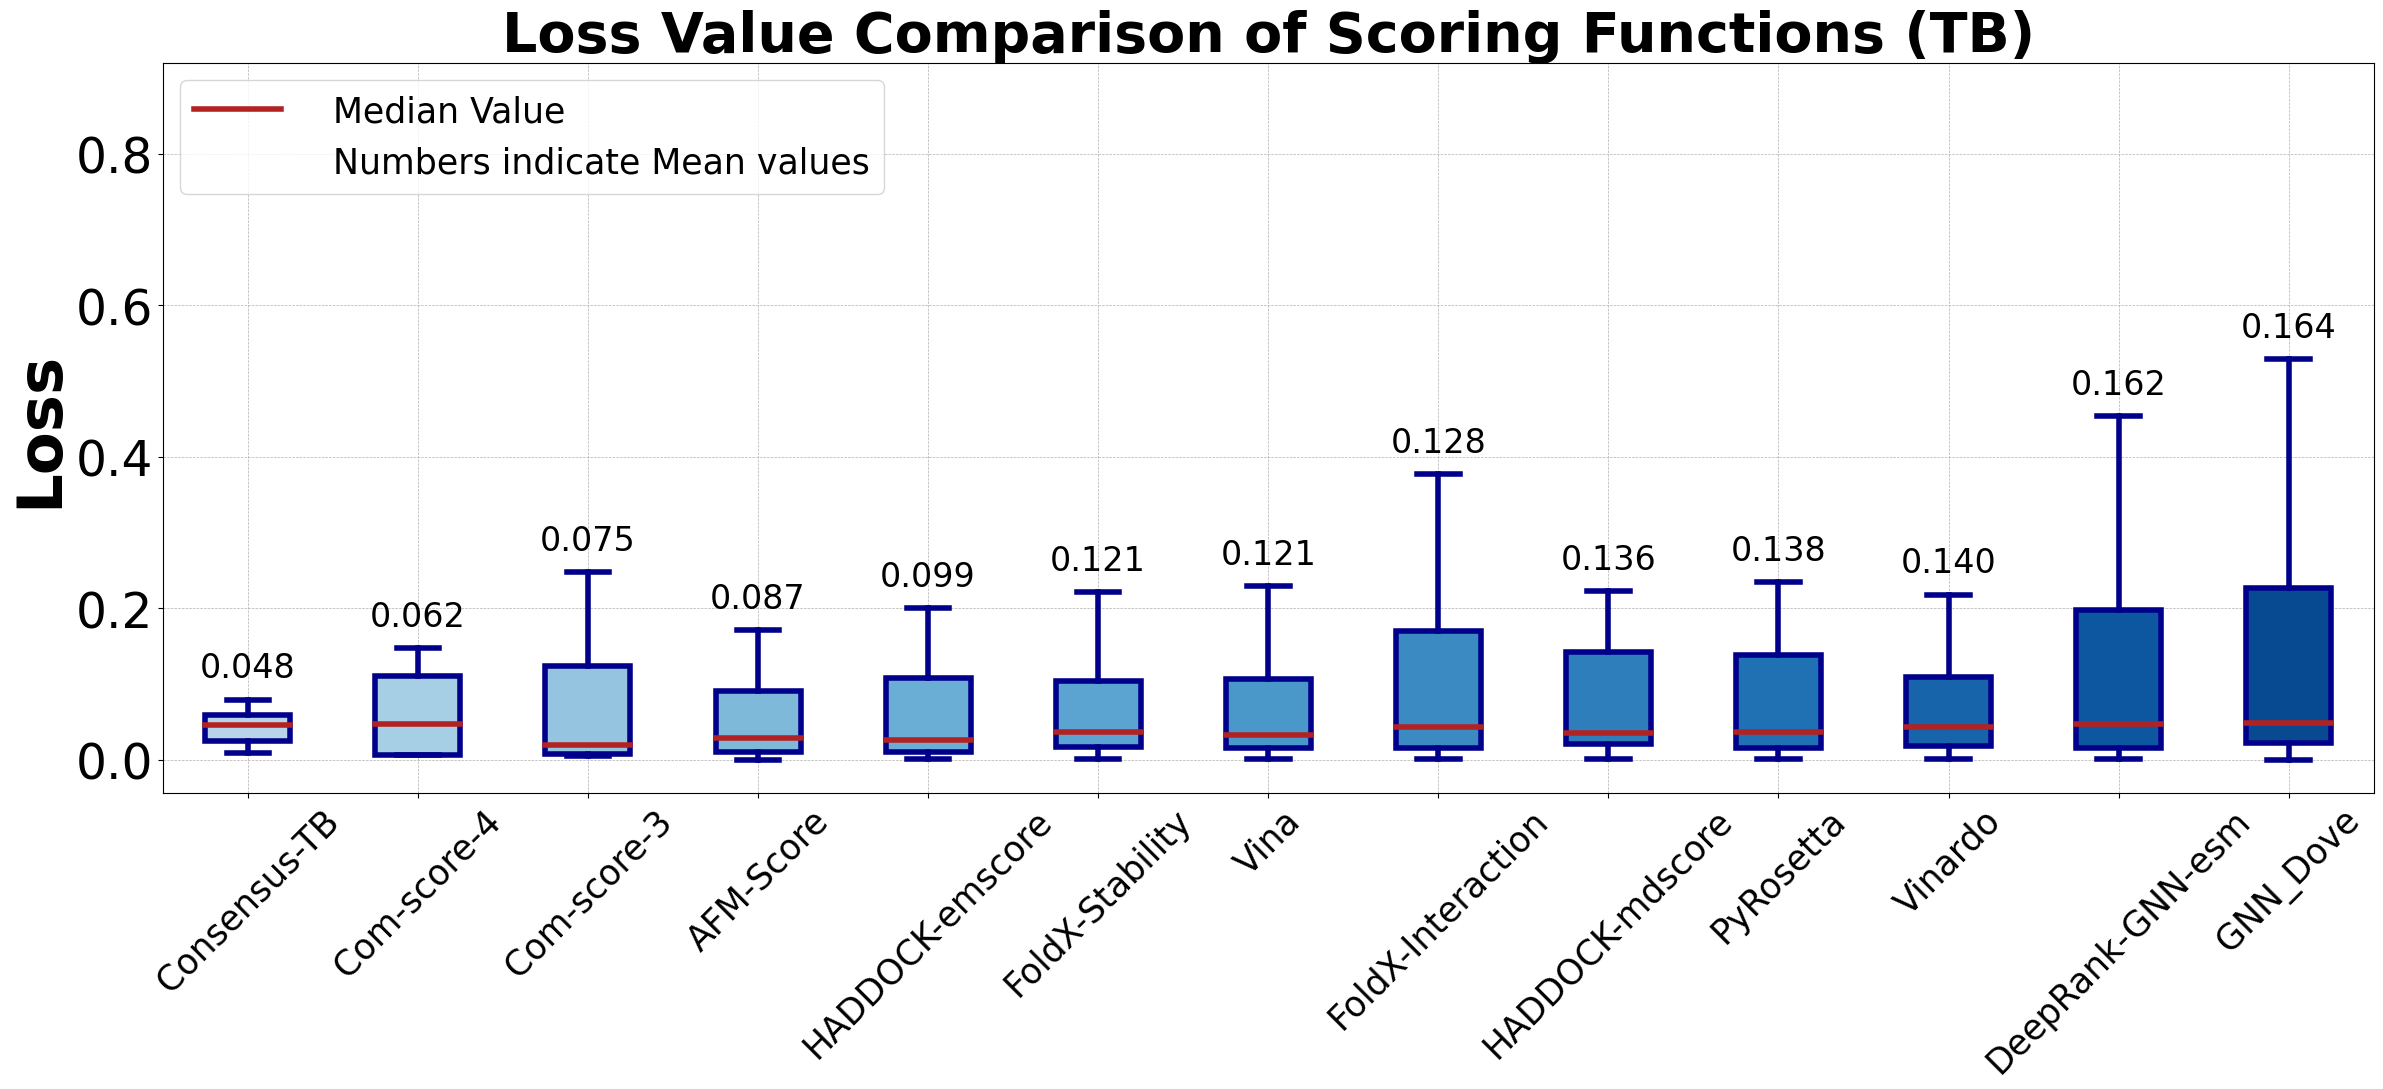

Statistics for each box in the plot:

Consensus-TB:
Mean: 0.04779513354219868
Median: 0.046023293685930874
Q1 (25th percentile): 0.02480126470993016
Q3 (75th percentile): 0.05870757351967142
IQR: 0.03390630880974126
Minimum: 0.008294761000945616
Maximum: 0.1100292872035066
Spread: 0.10173452620256099

Com-score-4:
Mean: 0.06202507781793868
Median: 0.04759964532296174
Q1 (25th percentile): 0.006635868855312366
Q3 (75th percentile): 0.10998315512778085
IQR: 0.10334728627246849
Minimum: 0.005947527376351625
Maximum: 0.1472447137898739
Spread: 0.14129718641352226

Com-score-3:
Mean: 0.07491396488004486
Median: 0.019494285983755244
Q1 (25th percentile): 0.007193297663786596
Q3 (75th percentile): 0.12396555383055881
IQR: 0.11677225616677221
Minimum: 0.004494022476226545
Maximum: 0.2475741716179107
Spread: 0.24308014914168416

AFM-Score:
Mean: 0.08695541308788478
Median: 0.028176723638076273
Q1 (25th percentile): 0.010520286086441092
Q3 (75th percentile): 0.09099643371135557
IQR: 0.0804761476

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

# Set the directory path as specified in the configuration file
directory_path = config['Loss_consensus_TB']

# Construct file paths
file_paths = {
    'AFM-Score': os.path.join(directory_path, "AlphaFold_TB.xlsx"),
    'PyRosetta': os.path.join(directory_path, "Pyrosetta_TB.xlsx"),
    'FoldX-Stability': os.path.join(directory_path, "Foldx_stability_TB.xlsx"),
    'FoldX-Interaction': os.path.join(directory_path, "Foldx_Interaction_TB.xlsx"),
    'HADDOCK-emscore': os.path.join(directory_path, "Haddock_emscore_TB.xlsx"),
    'HADDOCK-mdscore': os.path.join(directory_path, "Haddock_mdscore_TB.xlsx"),
    'GNN_Dove': os.path.join(directory_path, "gnn_dove_TB.xlsx"),
    'Vina': os.path.join(directory_path, "Vina_loss_TB.xlsx"),
    'Vinardo': os.path.join(directory_path, "Vinardo_loss_TB.xlsx"),
    'DeepRank-GNN-esm': os.path.join(directory_path, "Deep_GNN_TB.xlsx"),
    'Com-score-3': os.path.join(directory_path, "updated_common_models_final_md_20.xlsx"),
    'Com-score-4': os.path.join(directory_path, "updated_common_models_final_pyrosetta_20.xlsx"),
    'Consensus-TB': os.path.join(directory_path, "dockq_values_TB_1000.xlsx"),
}

# Load the data from the Excel files into DataFrames
data_frames = {label: pd.read_excel(path) for label, path in file_paths.items()}

# Prepare the data for plotting, removing NaN values
data_to_plot = [df['Loss'].dropna() for df in data_frames.values()]

# Calculate means and sort data by mean values
means = [np.mean(data) for data in data_to_plot]
sorted_indices = np.argsort(means)
data_to_plot_sorted = [data_to_plot[i] for i in sorted_indices]
labels_sorted = [list(data_frames.keys())[i] for i in sorted_indices]
sorted_means = [means[i] for i in sorted_indices]  # Ensure mean values are sorted

# Create the boxplot with specified styles and colors
plt.figure(figsize=(24, 11))
boxplot = plt.boxplot(data_to_plot_sorted, labels=labels_sorted, patch_artist=True,
                      boxprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      medianprops=dict(linestyle='-', linewidth=4, color='firebrick'),
                      whiskerprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      capprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      flierprops=dict(marker='', alpha=0))  # Outliers not shown

# Set colors for each box
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(labels_sorted)))
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Get the positions of the upper whiskers
whiskers = [whisker.get_ydata()[1] for whisker in boxplot['whiskers'][1::2]]

# Annotate the mean values above the upper whisker of each box plot with a slight offset
offset = 0.02  # Adjust this value as needed
for i, mean in enumerate(sorted_means):
    plt.text(i + 1, whiskers[i] + offset, f'{mean:.3f}', horizontalalignment='center', color='black', fontsize=24, verticalalignment='bottom')  # This line sets the text vertically

# Create custom legend handles
median_line = mlines.Line2D([], [], color='firebrick', linewidth=4, label='Median Value')
mean_text = mpatches.Patch(color='none', label='Numbers indicate Mean values')

# Option to change legend location
legend_location = 'upper left'  # Change this value to specify different locations

# Add the legend
plt.legend(handles=[median_line, mean_text], fontsize=25, loc=legend_location, handlelength=2.5, handletextpad=1.5)

# Set titles and labels
plt.title('Loss Value Comparison of Scoring Functions (TB)', fontsize=40, fontweight='bold')
plt.ylabel('Loss', fontsize=45, fontweight='bold')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Define save path and save the plot
save_path = f"{config['Main_Figures_directory']}/Fig_6d.png"
plt.savefig(save_path, dpi=1000, facecolor='white')

plt.show()

# Print statistics for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels_sorted, data_to_plot_sorted):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")


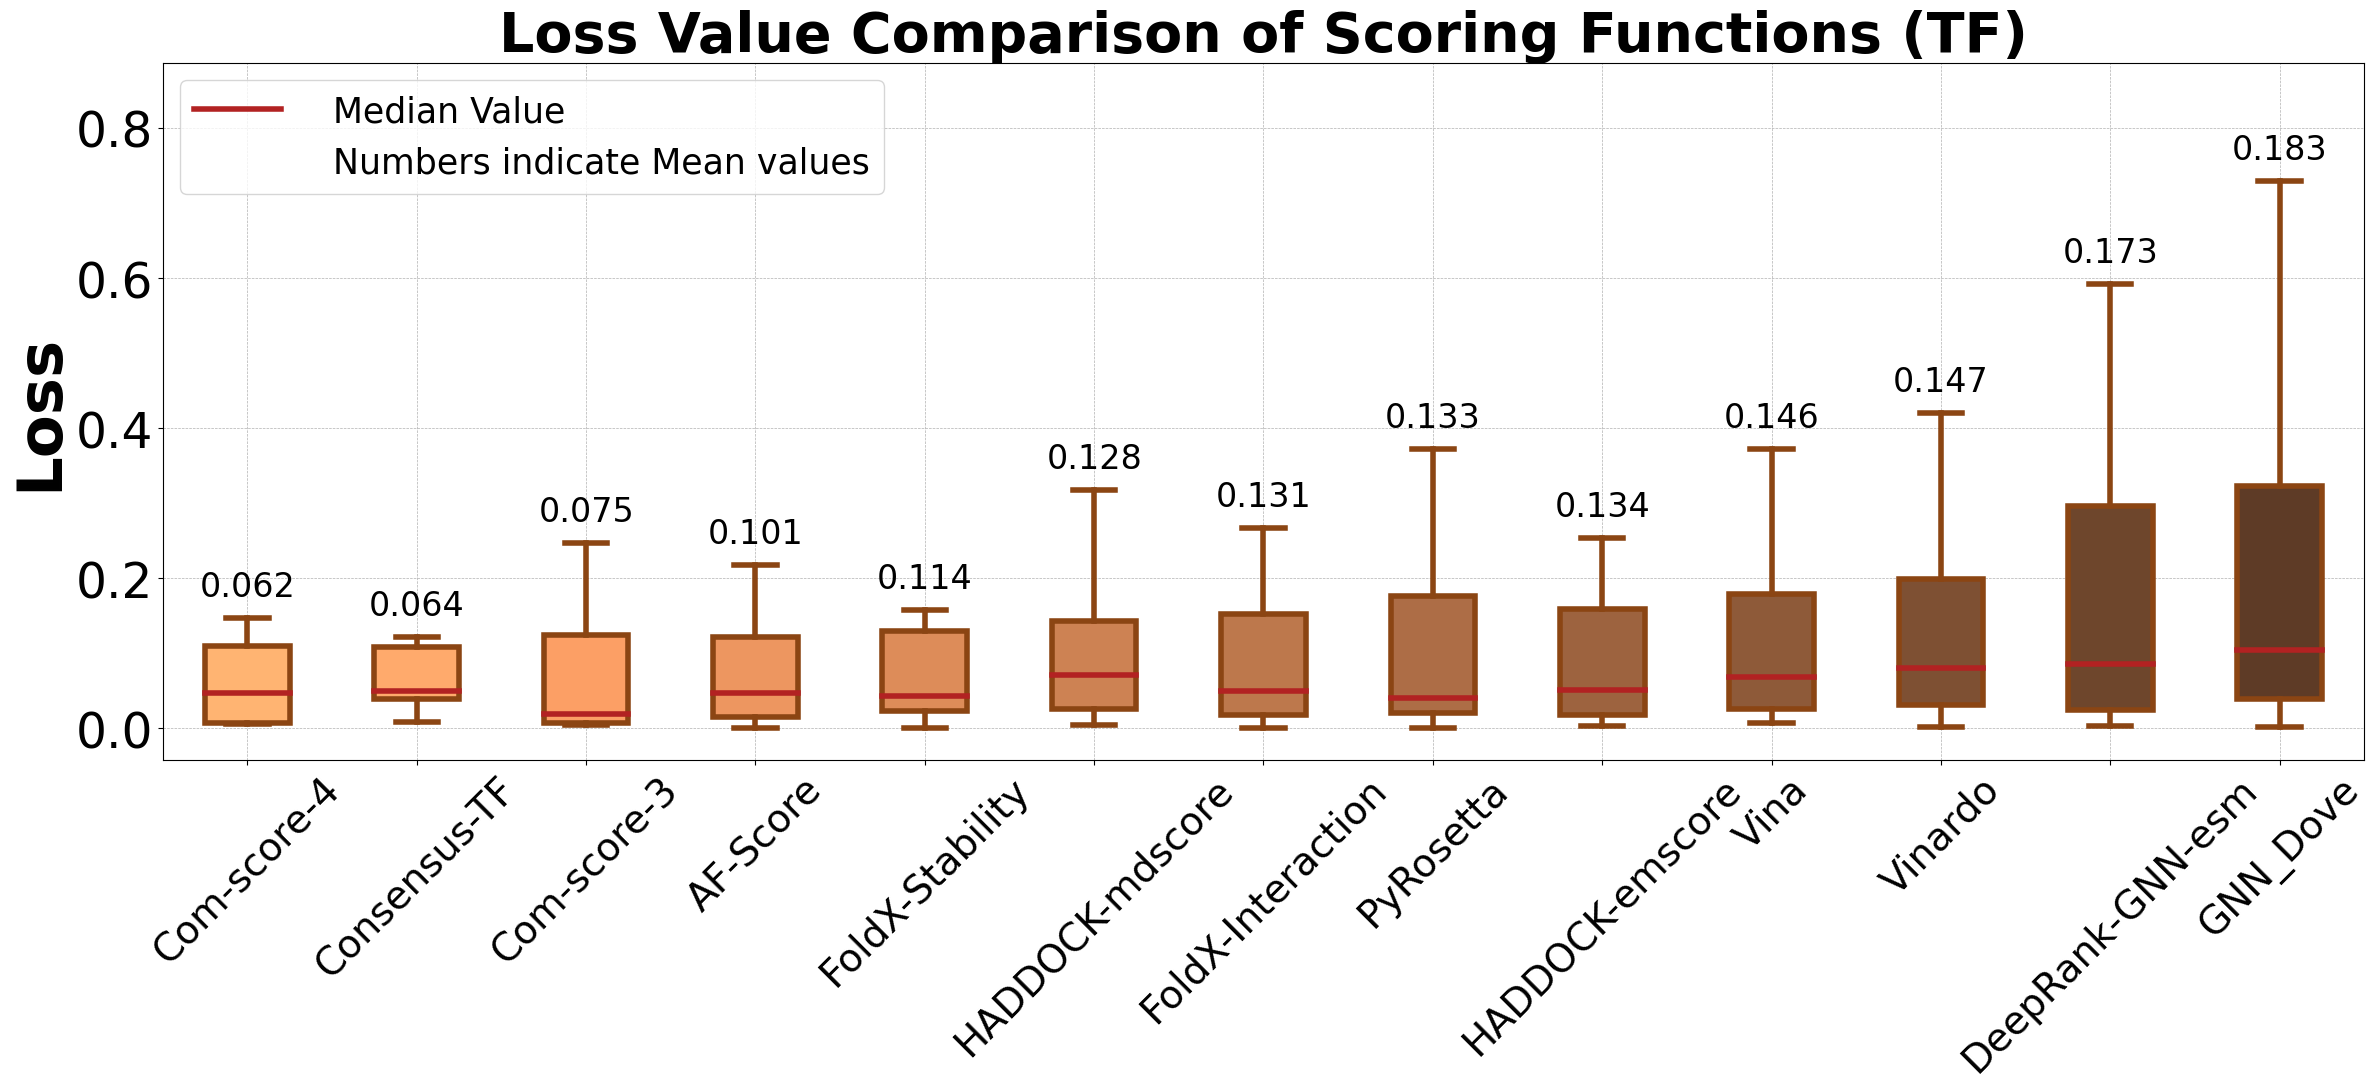

Statistics for each box in the plot:

Com-score-4:
Mean: 0.06202507781793868
Median: 0.04759964532296174
Q1 (25th percentile): 0.006635868855312366
Q3 (75th percentile): 0.10998315512778085
IQR: 0.10334728627246849
Minimum: 0.005947527376351625
Maximum: 0.1472447137898739
Spread: 0.14129718641352226

Consensus-TF:
Mean: 0.06370831555849163
Median: 0.05013751489848035
Q1 (25th percentile): 0.039089608309208254
Q3 (75th percentile): 0.10858436247362155
IQR: 0.0694947541644133
Minimum: 0.009112145431421803
Maximum: 0.1213034553020214
Spread: 0.1121913098705996

Com-score-3:
Mean: 0.07491396488004486
Median: 0.019494285983755244
Q1 (25th percentile): 0.007193297663786596
Q3 (75th percentile): 0.12396555383055881
IQR: 0.11677225616677221
Minimum: 0.004494022476226545
Maximum: 0.2475741716179107
Spread: 0.24308014914168416

AF-Score:
Mean: 0.10076800975319862
Median: 0.04724999396555302
Q1 (25th percentile): 0.014680210629689135
Q3 (75th percentile): 0.121193807191145
IQR: 0.1065135965614558

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

directory_path = config['Loss_consensus_TF']

# Define paths for each scoring function's Excel file
scoring_files = {
    'AF-Score': os.path.join(directory_path, "AlphaFold_TF.xlsx"),
    'PyRosetta': os.path.join(directory_path, "Pyrosetta_TF.xlsx"),
    'FoldX-Stability': os.path.join(directory_path, "Foldx_stability_TF.xlsx"),
    'FoldX-Interaction': os.path.join(directory_path, "Foldx_Interaction_TF.xlsx"),
    'HADDOCK-emscore': os.path.join(directory_path, "Haddock_emscore_TF.xlsx"),
    'HADDOCK-mdscore': os.path.join(directory_path, "Haddock_mdscore_TF.xlsx"),
    'GNN_Dove': os.path.join(directory_path, "gnn_dove_TF.xlsx"),
    'Vina': os.path.join(directory_path, "Vina_loss_TF.xlsx"),
    'Vinardo': os.path.join(directory_path, "Vinardo_loss_TF.xlsx"),
    'DeepRank-GNN-esm': os.path.join(directory_path, "Deep_GNN_TF.xlsx"),
    'Com-score-3': os.path.join(directory_path, "updated_common_models_final_md_20.xlsx"),
    'Com-score-4': os.path.join(directory_path, "updated_common_models_final_pyrosetta_20.xlsx"),
    'Consensus-TF': os.path.join(directory_path, "dockq_values_TF_1000.xlsx"),
}

# Extract loss values from each Excel file
data_to_plot = []
labels = []
for label, path in scoring_files.items():
    df = pd.read_excel(path)
    loss_data = df['Loss'].dropna()
    data_to_plot.append(loss_data)
    labels.append(label)

# Calculate means and sort data by mean values
means = [np.mean(data) for data in data_to_plot]
sorted_indices = np.argsort(means)
data_to_plot_sorted = [data_to_plot[i] for i in sorted_indices]
labels_sorted = [labels[i] for i in sorted_indices]
sorted_means = [means[i] for i in sorted_indices]  # Ensure mean values are sorted

# Plot configuration and generation
plt.figure(figsize=(24, 11))
colors = plt.cm.copper(np.linspace(0.9, 0.3, len(labels_sorted)))
boxprops = dict(linestyle='-', linewidth=4, color='#8B4513')
medianprops = dict(linestyle='-', linewidth=4, color='firebrick')
whiskerprops = dict(linestyle='-', linewidth=4, color='#8B4513')
capprops = dict(linestyle='-', linewidth=4, color='#8B4513')
flierprops = dict(marker='', alpha=0)  # Hide outliers
boxplot = plt.boxplot(data_to_plot_sorted, labels=labels_sorted, patch_artist=True,
                      boxprops=boxprops, medianprops=medianprops,
                      whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Get the positions of the upper whiskers
whiskers = [whisker.get_ydata()[1] for whisker in boxplot['whiskers'][1::2]]

# Annotate the mean values above the upper whisker of each box plot with a slight offset
offset = 0.02  # Adjust this value as needed
for i, mean in enumerate(sorted_means):
    plt.text(i + 1, whiskers[i] + offset, f'{mean:.3f}', horizontalalignment='center', color='black', fontsize=24, verticalalignment='bottom')  # This line sets the text vertically

# Create custom legend handles
median_line = mlines.Line2D([], [], color='firebrick', linewidth=4, label='Median Value')
mean_text = mpatches.Patch(color='none', label='Numbers indicate Mean values')

# Option to change legend location
legend_location = 'upper left' 

# Add the legend
plt.legend(handles=[median_line, mean_text], fontsize=25, loc=legend_location, handlelength=2.5, handletextpad=1.5)

# Set titles and labels
plt.title('Loss Value Comparison of Scoring Functions (TF)', fontsize=40, fontweight='bold')
plt.ylabel('Loss', fontsize=45, fontweight='bold')
plt.xticks(rotation=45, fontsize=28)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the figure
save_path = f"{config['Main_Figures_directory']}/Fig_6e.png"
plt.savefig(save_path, dpi=1000, facecolor='white')
plt.show()

# Print statistics for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels_sorted, data_to_plot_sorted):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")
